In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CAPSTONE PROJECT ON AIRBNB

### Task 1: Data Understanding and feature creation

#### Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [3]:
df_cal = pd.read_csv("F:\Hero Vired - Data Science and Business Analytics Course\Capstone Project\Problem Statements-20240601\Airbnb\AirBnB Project\calendar.csv")
df_hosts = pd.read_csv("F:\Hero Vired - Data Science and Business Analytics Course\Capstone Project\Problem Statements-20240601\Airbnb\AirBnB Project\hosts.csv")
df_listings = pd.read_csv("F:\Hero Vired - Data Science and Business Analytics Course\Capstone Project\Problem Statements-20240601\Airbnb\AirBnB Project\listings.csv")
df_reviews = pd.read_csv (r"F:\Hero Vired - Data Science and Business Analytics Course\Capstone Project\Problem Statements-20240601\Airbnb\AirBnB Project\reviews.csv")

### Calendar Data Preparation

In [4]:
df_cal

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125
...,...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06 00:00:00.000000,1,64.0,64.0,1,10
319188,319189,36953202,2022-07-08 00:00:00.000000,0,140.0,140.0,3,1125
319189,319190,39580214,2022-06-13 00:00:00.000000,1,49.0,49.0,1,13
319190,319191,49016014,2022-10-26 00:00:00.000000,0,60.0,60.0,2,30


In [5]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [7]:
df_cal.nunique()

calender_id       319192
listing_id          1749
date                 365
available              2
price                598
adjusted_price       596
minimum_nights        36
maximum_nights       208
dtype: int64

In [8]:
df_cal.describe()

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,319192.000000,3.191920e+05,319192.000000,319117.000000,319117.000000,319192.000000,319192.000000
mean,159596.500000,3.488528e+07,0.535192,109.917779,109.712131,5.379395,812.206102
std,92142.937899,1.523257e+07,0.498761,185.791168,185.551851,21.456127,511.622075
min,1.000000,5.090400e+04,0.000000,13.000000,13.000000,1.000000,1.000000
25%,79798.750000,2.338661e+07,0.000000,59.000000,58.000000,1.000000,365.000000
50%,159596.500000,3.891969e+07,1.000000,79.000000,79.000000,2.000000,1125.000000
75%,239394.250000,4.839174e+07,1.000000,115.000000,115.000000,3.000000,1125.000000
max,319192.000000,5.398332e+07,1.000000,5800.000000,5800.000000,500.000000,9999.000000


#### Inspect for any instances of missing values, outliers, or data inconsistencies

In [9]:
#Changing the dtype of the date column into date format

df_cal['date'] = pd.to_datetime(df_cal['date'])

In [10]:
#Checking for the years we have received the data

df_cal['date'].dt.year.unique()

array([2022, 2021])

In [11]:
#checking for the null values

df_cal.isna().sum()

calender_id        0
listing_id         0
date               0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
dtype: int64

In [12]:
# dropping the null values

df_cal = df_cal.dropna(subset=['price'])

In [13]:
df_cal.isna().sum()

calender_id       0
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [14]:
#dropping the unwanted columns from the dataset

df_cal= df_cal.drop(columns = 'adjusted_price')

In [15]:
df_cal

,calender_id,listing_id,date,available,price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,2,1125
...,...,...,...,...,...,...,...
319187,319188,52729945,2022-07-06,1,64.0,1,10
319188,319189,36953202,2022-07-08,0,140.0,3,1125
319189,319190,39580214,2022-06-13,1,49.0,1,13
319190,319191,49016014,2022-10-26,0,60.0,2,30


### Host data Preparation


In [16]:
df_hosts.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [17]:
df_hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


#### Inspect for any instances of missing values, outliers, or data inconsistencies

In [18]:
#changing the dtype of the hostsince column to date type

df_hosts['host_since'] = pd.to_datetime(df_hosts['host_since'])

In [19]:
#calculating the host age in months

from datetime import datetime

def months_since(date):
    today = datetime.today()
    return (today.year - date.year) * 12 + today.month - date.month

df_hosts['Host_Age'] = df_hosts['host_since'].apply(months_since)

In [20]:
# Removing the unwanted columns from the hosts dataset

df_hosts = df_hosts.drop(columns = ['host_name','host_location','host_about'])

In [21]:
df_hosts

,host_id,host_since,Host_Age
0,234077,2010-09-14,165
1,334804,2011-01-04,161
2,413052,2011-02-27,160
3,452791,2011-03-20,159
4,462975,2011-03-25,159
...,...,...,...
1106,434049804,2021-11-30,31
1107,435722877,2021-12-12,30
1108,435999398,2021-12-14,30
1109,436739371,2021-12-20,30


### Listings Data Preparation

In [22]:
df_listings

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,53916524,https://www.airbnb.com/rooms/53916524,Industrial spacious loft in Antwerp!,Industrial loft (110m²) with a relaxing urban ...,51.231330,4.403520,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Refrigerator"", ""Elevator"", ""Yamaha RX-A550 s...",46300712
1745,53928545,https://www.airbnb.com/rooms/53928545,Studio in het midden van Antwerpen,Recent gerenoveerde rustige studio van circa 2...,51.213210,4.397080,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Hot water"", ""Long term stays allowed"", ""Kitc...",74268936
1746,53929354,https://www.airbnb.com/rooms/53929354,Mooi appartement met open haard,Vanuit deze ideaal gelegen accommodatie kun je...,51.200340,4.421060,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Smoke alarm"", ""Outdoor furniture""...",334036639
1747,53949105,https://www.airbnb.com/rooms/53949105,Kasteel Boterlaerhof vlakbij Antwerpen,"Kasteel Boterlaerhof ligt ideaal gelegen, op 1...",51.212320,4.482230,Castle,Entire home/apt,16,7.5 baths,7.0,33.0,"[""Refrigerator"", ""Private garden or backyard"",...",377595714


In [23]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


#### Inspect for any instances of missing values, outliers, or data inconsistencies

In [24]:
df_listings.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

In [25]:
def extract_bathroom_info(text):
    parts = text.split()
    if parts:
        numeric_text = parts[0]
        try:
            numeric_value = float(numeric_text)
        except ValueError:
            numeric_value = None
        text_value = ' '.join(parts[1:]) if len(parts) > 1 else None
        return numeric_value, text_value
    else:
        return None, None

# Verify that the column exists in the DataFrame
if 'bathrooms_text' in df_listings.columns:
    # Apply the function and create new columns
    df_listings[['bathroom_number', 'bathroom_type']] = df_listings['bathrooms_text'].apply(lambda x: pd.Series(extract_bathroom_info(x)))
else:
    print("Column 'bathrooms_text' does not exist in the DataFrame")
    
# Drop the original 'bathrooms_text'
df_listings.drop('bathrooms_text', axis=1, inplace=True)

In [26]:
df_listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,bathroom_number,bathroom_type
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1.0,private bath
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2.5,baths
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,1.0,bath
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,2.0,shared baths
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,1.0,bath


In [27]:
#Filling the null values of bedrooms column using the mean value of each room type

# Calculate the average number of bedrooms for each room type
average_bedrooms = df_listings.groupby('room_type')['bedrooms'].mean()

# Function to fill null values in the 'bedrooms' column based on the room type
def fill_bedrooms(row, averages):
    if pd.isnull(row['bedrooms']):
        return averages[row['room_type']]
    else:
        return row['bedrooms']

# Apply the function to fill null values in the 'bedrooms' column
df_listings['bedrooms'] = df_listings.apply(lambda row: fill_bedrooms(row, average_bedrooms), axis=1)

In [28]:
#Filling the null values of beds column using the mean value of each bedrooms value

# Calculate the average number of beds for each number of bedrooms
average_beds = df_listings.groupby('bedrooms')['beds'].mean()

# Function to fill null values in the 'beds' column based on the number of bedrooms
def fill_beds(row, averages):
    if pd.isnull(row['beds']):
        return averages[row['bedrooms']]
    else:
        return row['beds']

# Apply the function to fill null values in the 'beds' column
df_listings['beds'] = df_listings.apply(lambda row: fill_beds(row, average_beds), axis=1)

In [29]:
df_listings.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bedrooms            0
beds                0
amenities           0
host_id             0
bathroom_number    11
bathroom_type       5
dtype: int64

In [30]:
# Calculate the average number of bathrooms for each room type
average_bathrooms = df_listings.groupby('room_type')['bathroom_number'].mean()

# Function to fill null values in the 'bedrooms' column based on the room type
def fill_bathrooms(row, averages):
    if pd.isnull(row['bathroom_number']):
        return averages[row['room_type']]
    else:
        return row['bathroom_number']

# Apply the function to fill null values in the 'bedrooms' column
df_listings['bathroom_number'] = df_listings.apply(lambda row: fill_bathrooms(row, average_bathrooms), axis=1)

In [31]:
df_listings.isna().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bedrooms            0
beds                0
amenities           0
host_id             0
bathroom_number     0
bathroom_type       5
dtype: int64

In [32]:
df_listings.dropna(subset='bathroom_type', inplace=True)

In [33]:
df_listings = df_listings.drop(columns = ['listing_url','name','description'])

In [34]:
df_listings.head()

,listing_id,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,amenities,host_id,bathroom_number,bathroom_type
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077,1.0,private bath
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942,2.5,baths
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664,1.0,bath
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377,2.0,shared baths
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933,1.0,bath


In [35]:
df_listings.describe()

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id,bathroom_number
count,1.744000e+03,1744.000000,1744.000000,1744.000000,1744.000000,1744.000000,1.744000e+03,1744.000000
mean,3.484844e+07,51.214070,4.413147,3.762041,1.531794,2.217549,1.416889e+08,1.318593
std,1.524609e+07,0.013757,0.019384,2.774179,1.052006,2.232860,1.286405e+08,0.690033
min,5.090400e+04,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05,0.000000
25%,2.337066e+07,51.207860,4.400163,2.000000,1.000000,1.000000,2.863131e+07,1.000000
50%,3.890884e+07,51.216545,4.409460,3.000000,1.000000,2.000000,1.033579e+08,1.000000
75%,4.839009e+07,51.220886,4.424652,4.000000,2.000000,3.000000,2.347361e+08,1.500000
max,5.398332e+07,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08,15.500000


In [36]:
# Function to clean and parse the amenities column
def parse_amenities(val):
    try:
        # Remove curly braces and split by comma
        amenities_list = val.replace("{", "").replace("}", "").replace('"', "").split(", ")
        return amenities_list
    except Exception as e:
        print(f"Error in row: {val}")
        return []

# Apply the function to the 'amenities' column
df_listings['amenities'] = df_listings['amenities'].apply(parse_amenities)

# Print the DataFrame to check if parsing is correct
print("Parsed amenities:")
print(df_listings['amenities'].head())

# List of top 10 amenities
top_10_amenities = ['Wifi', 'Essentials', 'Kitchen', 'Smoke alarm', 'Heating', 
                    'Long term stays allowed', 'Hangers', 'Hot water', 
                    'Hair dryer', 'Dishes and silverware']

# Create columns for each of the top 10 amenities and fill with 0 or 1
for amenity in top_10_amenities:
    df_listings[amenity] = df_listings['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Display the first few rows of the updated dataframe to verify the new columns
print("\nDataFrame with top 10 amenities:")
print(df_listings[['amenities'] + top_10_amenities].head())

Parsed amenities:
0    [[Kitchen, Smoke alarm, Hair dryer, Keypad, Ca...
1    [[Refrigerator, Elevator, Paid street parking ...
2    [[Paid street parking off premises, Kitchen, S...
3    [[Fire extinguisher, Backyard, Long term stays...
4    [[Refrigerator, Kitchen, Smoke alarm, Shampoo,...
Name: amenities, dtype: object

DataFrame with top 10 amenities:
                                           amenities  Wifi  Essentials  \
0  [[Kitchen, Smoke alarm, Hair dryer, Keypad, Ca...     1           1   
1  [[Refrigerator, Elevator, Paid street parking ...     1           1   
2  [[Paid street parking off premises, Kitchen, S...     1           1   
3  [[Fire extinguisher, Backyard, Long term stays...     1           0   
4  [[Refrigerator, Kitchen, Smoke alarm, Shampoo,...     1           1   

   Kitchen  Smoke alarm  Heating  Long term stays allowed  Hangers  Hot water  \
0        0            1        1                        1        1          1   
1        1            1        1   

In [37]:
df_listings = df_listings.drop(columns = 'amenities')

In [38]:
df_listings['top_10_amenities_count'] = df_listings[top_10_amenities].sum(axis=1)

In [39]:
df_listings.head()

,listing_id,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,host_id,bathroom_number,...,Essentials,Kitchen,Smoke alarm,Heating,Long term stays allowed,Hangers,Hot water,Hair dryer,Dishes and silverware,top_10_amenities_count
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,1,0,1,1,1,1,1,1,1,9
1,116134,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.0,2.0,586942,2.5,...,1,1,1,1,1,1,1,1,1,10
2,218916,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1.0,3.0,915664,1.0,...,1,1,1,0,1,1,1,1,1,9
3,224333,51.197720,4.458530,Private room in residential home,Private room,2,1.0,1.0,1167377,2.0,...,0,1,1,0,1,0,0,0,0,4
4,224682,51.217220,4.397900,Entire rental unit,Entire home/apt,3,1.0,2.0,1263933,1.0,...,1,1,1,1,1,0,1,1,1,9


### Reviews table preparation


In [40]:
df_reviews.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [41]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62922 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [42]:
df_reviews.isna().sum()

review_id         0
listing_id        0
date              0
reviewer_id       0
reviewer_name     0
comments         65
dtype: int64

In [43]:
#Converting the dtype of the date into date and renaming it to review_date

df_reviews['review_date'] = pd.to_datetime(df_reviews['date'])

In [44]:
df_reviews = df_reviews.drop(columns = ['date','reviewer_name','comments'])

In [45]:
df_reviews

,review_id,listing_id,reviewer_id,review_date
0,1,50904,19482395,2015-05-06
1,2,50904,333559,2021-10-10
2,3,116134,928644,2012-03-05
3,4,116134,231288,2012-05-25
4,5,116134,7984251,2013-09-03
...,...,...,...,...
62982,62983,53538847,48076753,2021-12-05
62983,62984,53600839,6635741,2021-12-12
62984,62985,53819793,247934155,2021-12-21
62985,62986,53825194,361042882,2021-12-19


### Merging all the required data into one table

In [46]:

# Merge df_listings with df_calendar
merged_with_cal = pd.merge(df_listings, df_cal, on='listing_id', how='inner')

# Merge with df_hosts
merged_df = pd.merge(merged_with_cal, df_hosts, on='host_id', how='inner')

merged_df.head()


,listing_id,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,host_id,bathroom_number,...,Dishes and silverware,top_10_amenities_count,calender_id,date,available,price,minimum_nights,maximum_nights,host_since,Host_Age
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,1,9,395,2022-06-23,1,165.0,1,60,2010-09-14,165
1,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,1,9,774,2022-01-16,1,150.0,1,60,2010-09-14,165
2,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,1,9,844,2022-05-17,1,165.0,1,60,2010-09-14,165
3,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,1,9,1851,2022-05-31,1,165.0,1,60,2010-09-14,165
4,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,1,9,4278,2022-10-20,0,165.0,1,60,2010-09-14,165


In the process of merging the data from df_listings, df_cal, and df_hosts, the decision was made to exclude the df_reviews table for the following reasons:

- **Data Size and Complexity:** The inclusion of df_reviews significantly increases the volume of data due to its many-to-many relationship with df_listings. This can lead to a substantial increase in the number of rows in the merged dataset, making it more challenging to manage and analyze efficiently.

- **Focus on Key Attributes:** The primary objective of merging df_listings, df_cal, and df_hosts was to consolidate essential information related to property listings, availability, and host details. These attributes are crucial for pricing analysis, market trends, and host behavior insights.

- **Avoiding Data Redundancy**: By excluding df_reviews, we mitigate the risk of duplicating calendar_id values across multiple review entries. This maintains the integrity of the dataset and reduces unnecessary redundancy in the data.

- **Analytical Clarity:** Separating reviews data allows for focused analysis on property attributes, availability patterns, and host characteristics without the noise introduced by subjective review data.

- **Flexible Analysis:** Keeping reviews data separate provides flexibility in how we analyze and interpret the dataset. It enables us to apply different analytical techniques specifically tailored to property listings and host behavior, enhancing the depth and clarity of our insights.

In summary, by not merging the df_reviews table into the consolidated dataset, we ensure a more focused, manageable, and analytically clear dataset for comprehensive analysis of property listings, availability trends, and host dynamics.

### Feature Engineering

In [47]:
# Calculating the distance of the properties to the airport using the logitudes and latitudes column

from math import radians, sin, cos, sqrt, atan2

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Calculate differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Calculate distance using Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    return distance

# Coordinates of the airport
airport_lat = 51.1894 
airport_lon = 4.4603

# Assuming merged_df is your DataFrame with 'lat' and 'long' columns
# Ensure the latitude and longitude columns are in float format
merged_df['latitude'] =merged_df['latitude'].astype(float)
merged_df['longitude'] = merged_df['longitude'].astype(float)

# Function to calculate distance using Haversine formula for each row
def calculate_distance(row):
    return haversine(row['latitude'], row['longitude'], airport_lat, airport_lon)

# Apply the function to each row to calculate distance
merged_df['distance_to_airport'] = merged_df.apply(calculate_distance, axis=1)

# Print the DataFrame with the calculated distances
merged_df[['listing_id', 'latitude', 'longitude', 'distance_to_airport']]


,listing_id,latitude,longitude,distance_to_airport
0,50904,51.218575,4.398631,5.383636
1,50904,51.218575,4.398631,5.383636
2,50904,51.218575,4.398631,5.383636
3,50904,51.218575,4.398631,5.383636
4,50904,51.218575,4.398631,5.383636
...,...,...,...,...
318220,53983318,51.214580,4.399620,5.070786
318221,53983318,51.214580,4.399620,5.070786
318222,53983318,51.214580,4.399620,5.070786
318223,53983318,51.214580,4.399620,5.070786


In [48]:
# Calculating the distance of the properties to the railway station using the logitudes and latitudes column


# Coordinates of the Antwerp Railway Station
railway_station_lat = 51.2172
railway_station_lon = 4.4211

# Function to calculate distance using Haversine formula for railway station
def calculate_distance_to_station(row):
    return haversine(row['latitude'], row['longitude'], railway_station_lat, railway_station_lon)

# Assuming merged_df is your DataFrame with 'latitude' and 'longitude' columns
# Ensure the latitude and longitude columns are in float format
merged_df['latitude'] = merged_df['latitude'].astype(float)
merged_df['longitude'] = merged_df['longitude'].astype(float)

# Apply the function to each row to calculate distance to railway station
merged_df['distance_to_railway_station'] = merged_df.apply(calculate_distance_to_station, axis=1)

# Print the DataFrame with the calculated distances
merged_df[['listing_id', 'latitude', 'longitude', 'distance_to_railway_station']]

,listing_id,latitude,longitude,distance_to_railway_station
0,50904,51.218575,4.398631,1.572374
1,50904,51.218575,4.398631,1.572374
2,50904,51.218575,4.398631,1.572374
3,50904,51.218575,4.398631,1.572374
4,50904,51.218575,4.398631,1.572374
...,...,...,...,...
318220,53983318,51.214580,4.399620,1.524207
318221,53983318,51.214580,4.399620,1.524207
318222,53983318,51.214580,4.399620,1.524207
318223,53983318,51.214580,4.399620,1.524207


In [49]:
merged_df.head()

,listing_id,latitude,longitude,property_type,room_type,accomodates,bedrooms,beds,host_id,bathroom_number,...,calender_id,date,available,price,minimum_nights,maximum_nights,host_since,Host_Age,distance_to_airport,distance_to_railway_station
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,395,2022-06-23,1,165.0,1,60,2010-09-14,165,5.383636,1.572374
1,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,774,2022-01-16,1,150.0,1,60,2010-09-14,165,5.383636,1.572374
2,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,844,2022-05-17,1,165.0,1,60,2010-09-14,165,5.383636,1.572374
3,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,1851,2022-05-31,1,165.0,1,60,2010-09-14,165,5.383636,1.572374
4,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,234077,1.0,...,4278,2022-10-20,0,165.0,1,60,2010-09-14,165,5.383636,1.572374


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318225 entries, 0 to 318224
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   318225 non-null  int64         
 1   latitude                     318225 non-null  float64       
 2   longitude                    318225 non-null  float64       
 3   property_type                318225 non-null  object        
 4   room_type                    318225 non-null  object        
 5   accomodates                  318225 non-null  int64         
 6   bedrooms                     318225 non-null  float64       
 7   beds                         318225 non-null  float64       
 8   host_id                      318225 non-null  int64         
 9   bathroom_number              318225 non-null  float64       
 10  bathroom_type                318225 non-null  object        
 11  Wifi                      

In [51]:
merged_df.isna().sum()

listing_id                     0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accomodates                    0
bedrooms                       0
beds                           0
host_id                        0
bathroom_number                0
bathroom_type                  0
Wifi                           0
Essentials                     0
Kitchen                        0
Smoke alarm                    0
Heating                        0
Long term stays allowed        0
Hangers                        0
Hot water                      0
Hair dryer                     0
Dishes and silverware          0
top_10_amenities_count         0
calender_id                    0
date                           0
available                      0
price                          0
minimum_nights                 0
maximum_nights                 0
host_since                     0
Host_Age                       0
distance_t

In [52]:
merged_df.describe()

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id,bathroom_number,Wifi,Essentials,...,calender_id,date,available,price,minimum_nights,maximum_nights,host_since,Host_Age,distance_to_airport,distance_to_railway_station
count,3.182250e+05,318225.000000,318225.000000,318225.000000,318225.000000,318225.000000,3.182250e+05,318225.000000,318225.000000,318225.000000,...,318225.000000,318225,318225.000000,318225.000000,318225.000000,318225.000000,318225,318225.000000,318225.000000,318225.000000
mean,3.487736e+07,51.214076,4.413136,3.763073,1.531468,2.219838,1.417978e+08,1.320259,0.956682,0.674488,...,159588.332362,2022-06-26 05:00:15.781286912,0.535590,110.034479,5.387097,813.100567,2017-01-06 18:04:16.912561920,89.241819,4.554438,1.734034
min,5.090400e+04,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05,0.000000,0.000000,0.000000,...,1.000000,2021-12-26 00:00:00,0.000000,13.000000,1.000000,1.000000,2010-09-14 00:00:00,30.000000,0.692816,0.021371
25%,2.338661e+07,51.207870,4.400140,2.000000,1.000000,1.000000,2.841925e+07,1.000000,1.000000,0.000000,...,79800.000000,2022-03-27 00:00:00,0.000000,59.000000,1.000000,365.000000,2015-03-11 00:00:00,65.000000,3.824489,1.004179
50%,3.891969e+07,51.216580,4.409460,3.000000,1.000000,2.000000,1.033525e+08,1.000000,1.000000,1.000000,...,159589.000000,2022-06-26 00:00:00,1.000000,79.000000,2.000000,1125.000000,2016-11-11 00:00:00,91.000000,4.740606,1.487432
75%,4.839174e+07,51.220905,4.424660,4.000000,2.000000,3.000000,2.354916e+08,1.500000,1.000000,1.000000,...,239378.000000,2022-09-25 00:00:00,1.000000,116.000000,3.000000,1125.000000,2019-01-09 00:00:00,111.000000,5.344192,1.997626
max,5.398332e+07,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08,15.500000,1.000000,1.000000,...,319192.000000,2022-12-25 00:00:00,1.000000,5800.000000,500.000000,9999.000000,2021-12-24 00:00:00,165.000000,19.590338,15.685444
std,1.524321e+07,0.013748,0.019379,2.774534,1.058108,2.254595,1.287559e+08,0.693329,0.203573,0.468567,...,92141.077465,NaN,0.498733,186.031267,21.487171,511.406060,NaN,29.955783,1.320784,1.257199


In [53]:
final_df=merged_df

In [54]:
# Define continuous and categorical variables
continuous_vars = ['latitude', 'longitude', 'accomodates', 'bathroom_number', 'bedrooms', 'beds',
                   'price', 'minimum_nights', 'maximum_nights','top_10_amenities_count', 'Host_Age', 'distance_to_airport', 'distance_to_railway_station']

categorical_vars = ['property_type','room_type','available','bathroom_type','Wifi','Essentials','Kitchen','Smoke alarm','Heating','Long term stays allowed','Hangers','Hot water','Hair dryer','Dishes and silverware']

# Continuous Variables Report
continuous_report = merged_df[continuous_vars].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95])

# Categorical Variables Report
categorical_report = pd.DataFrame(columns=['# Unique Values'])

for col in categorical_vars:
    unique_vals = merged_df[col].nunique()
    categorical_report.loc[col] = [unique_vals]

# Display reports
print("Continuous Variables Report:")
print(continuous_report)
print("\nCategorical Variables Report:")
print(categorical_report)


Continuous Variables Report:
            latitude      longitude    accomodates  bathroom_number  \
count  318225.000000  318225.000000  318225.000000    318225.000000   
mean       51.214076       4.413136       3.763073         1.320259   
std         0.013748       0.019379       2.774534         0.693329   
min        51.160084       4.290770       1.000000         0.000000   
25%        51.207870       4.400140       2.000000         1.000000   
50%        51.216580       4.409460       3.000000         1.000000   
75%        51.220905       4.424660       4.000000         1.500000   
90%        51.225720       4.438630       7.000000         1.500000   
95%        51.230580       4.447670      10.000000         2.500000   
max        51.349400       4.483470      16.000000        15.500000   

            bedrooms           beds          price  minimum_nights  \
count  318225.000000  318225.000000  318225.000000   318225.000000   
mean        1.531468       2.219838     110.03447

In [55]:
csv_file = 'merged_df.csv'
merged_df.to_csv(csv_file, index=False)

# Provide a download link (for Jupyter Notebook or JupyterLab)
from IPython.display import FileLink
display(FileLink(csv_file))

C:\Users\91982\merged_df.csv

### Task 2- Variable profiling and checking relationships between variables:

#### 1. Assess the relationship between target and predictor variables. You can compute correlations, plot bivariate relationships.

We will compute correlations for numerical variables and plot bivariate relationships for both numerical and categorical variables.

A. Numerical variables to check correlations with price

In [56]:
numerical_vars = ['accomodates', 'bathroom_number', 'bedrooms', 'beds', 'top_10_amenities_count', 'Host_Age', 'minimum_nights', 'maximum_nights','distance_to_airport','distance_to_railway_station']
# Calculate correlations
correlations = merged_df[numerical_vars + ['price']].corr()
print("Correlation Matrix:\n", correlations)

Correlation Matrix:
                              accomodates  bathroom_number  bedrooms      beds  \
accomodates                     1.000000         0.396961  0.581147  0.716186   
bathroom_number                 0.396961         1.000000  0.597467  0.536368   
bedrooms                        0.581147         0.597467  1.000000  0.807273   
beds                            0.716186         0.536368  0.807273  1.000000   
top_10_amenities_count          0.170133         0.063840  0.016226  0.048256   
Host_Age                       -0.127135         0.003060  0.021513 -0.066521   
minimum_nights                 -0.061651        -0.003115 -0.003744 -0.024083   
maximum_nights                 -0.155323         0.008957  0.034555 -0.031209   
distance_to_airport             0.163966         0.103096  0.114896  0.161420   
distance_to_railway_station    -0.043013         0.063587  0.068955  0.083539   
price                           0.200046         0.240589  0.246648  0.191801   

      

## Exploratory Data Analysis

#### Plot heatmap of correlations between Numerical Variables

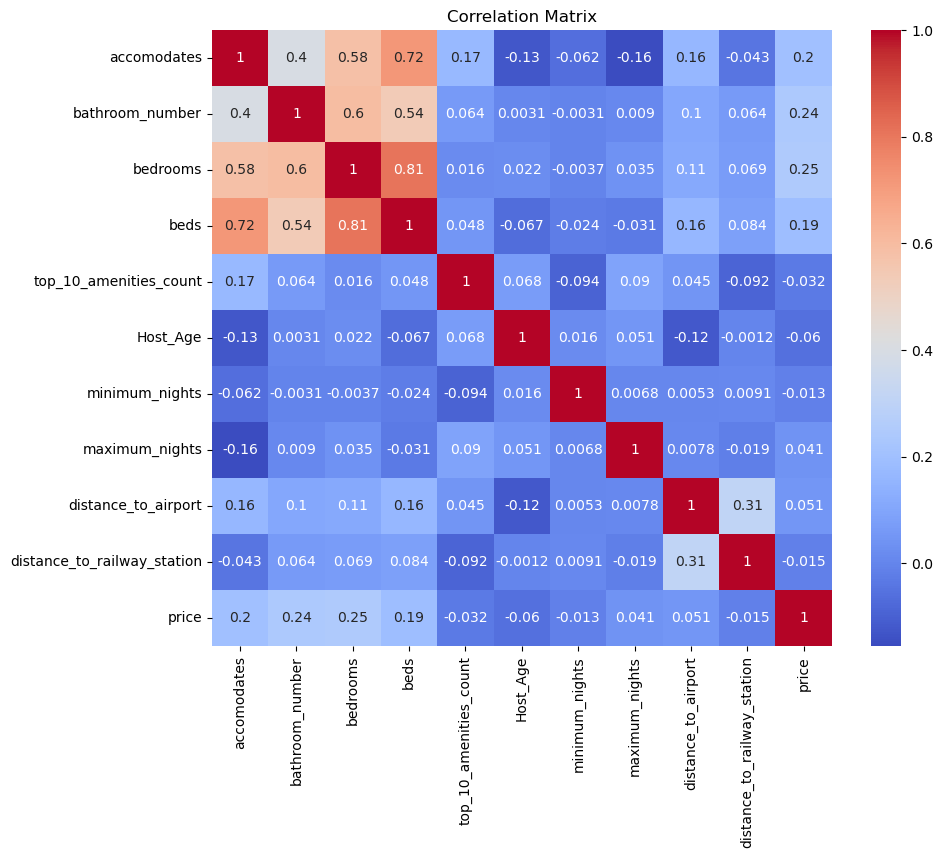

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Price Correlations:

- Bathroom Number: The number of bathrooms has a moderate positive correlation with price (0.24).
- Bedrooms: The number of bedrooms shows a positive correlation with price (0.25).
- Accommodates: The number of people the listing can accommodate has a lower positive correlation with price (0.20).
- Beds: The number of beds also shows a positive correlation with price (0.190.19).
- Other Factors: Other factors like the top 10 amenities count, Host Age, minimum nights, maximum nights, distance to the airport, and distance to the railway station show weaker correlations with price, ranging from −0.032 to 0.051.

Inter-Feature Correlations:

- Accommodates and Beds: There is a strong positive correlation between the number of people accommodated and the number of beds (0.72).
- Bedrooms and Beds: Bedrooms and beds also have a strong positive correlation (0.81).
- Accommodates and Bedrooms: These two features show a strong positive correlation (0.58).
- Bathroom Number and Bedrooms: The number of bathrooms and bedrooms are moderately correlated (0.60).
- Distance to Airport and Distance to Railway Station: There is a notable positive correlation between these two distance-related features (0.31).

Weak or Negative Correlations:

- Host Age: Host Age generally shows weak correlations with other features.
- Minimum and Maximum Nights: These show weak correlations with most features, including price.
- Top 10 Amenities Count: This has weak correlations with most features, indicating that the number of amenities does not strongly relate to the other numerical variables in the dataset.

#### Plot bivariate relationships using Boxplot and HIstogram

         listing_id       latitude      longitude    accomodates  \
count  3.182250e+05  318225.000000  318225.000000  318225.000000   
mean   3.487736e+07      51.214076       4.413136       3.763073   
std    1.524321e+07       0.013748       0.019379       2.774534   
min    5.090400e+04      51.160084       4.290770       1.000000   
25%    2.338661e+07      51.207870       4.400140       2.000000   
50%    3.891969e+07      51.216580       4.409460       3.000000   
75%    4.839174e+07      51.220905       4.424660       4.000000   
max    5.398332e+07      51.349400       4.483470      16.000000   

            bedrooms           beds       host_id  bathroom_number  \
count  318225.000000  318225.000000  3.182250e+05    318225.000000   
mean        1.531468       2.219838  1.417978e+08         1.320259   
std         1.058108       2.254595  1.287559e+08         0.693329   
min         1.000000       1.000000  2.340770e+05         0.000000   
25%         1.000000       1.000000  

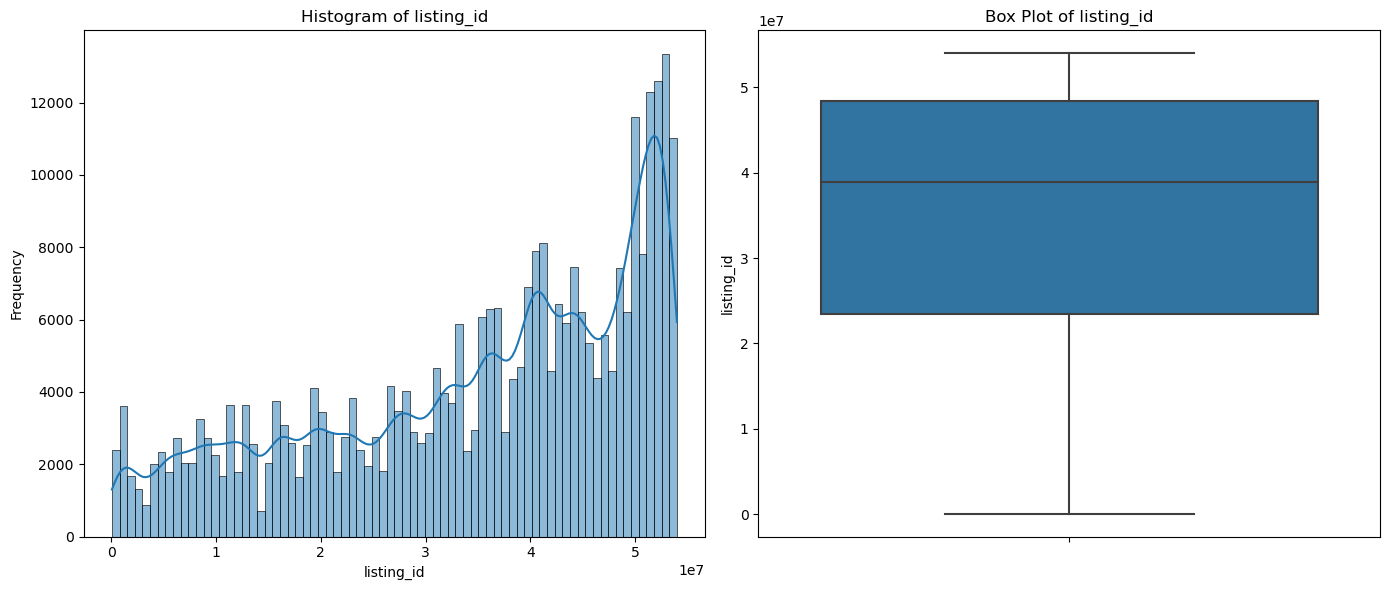

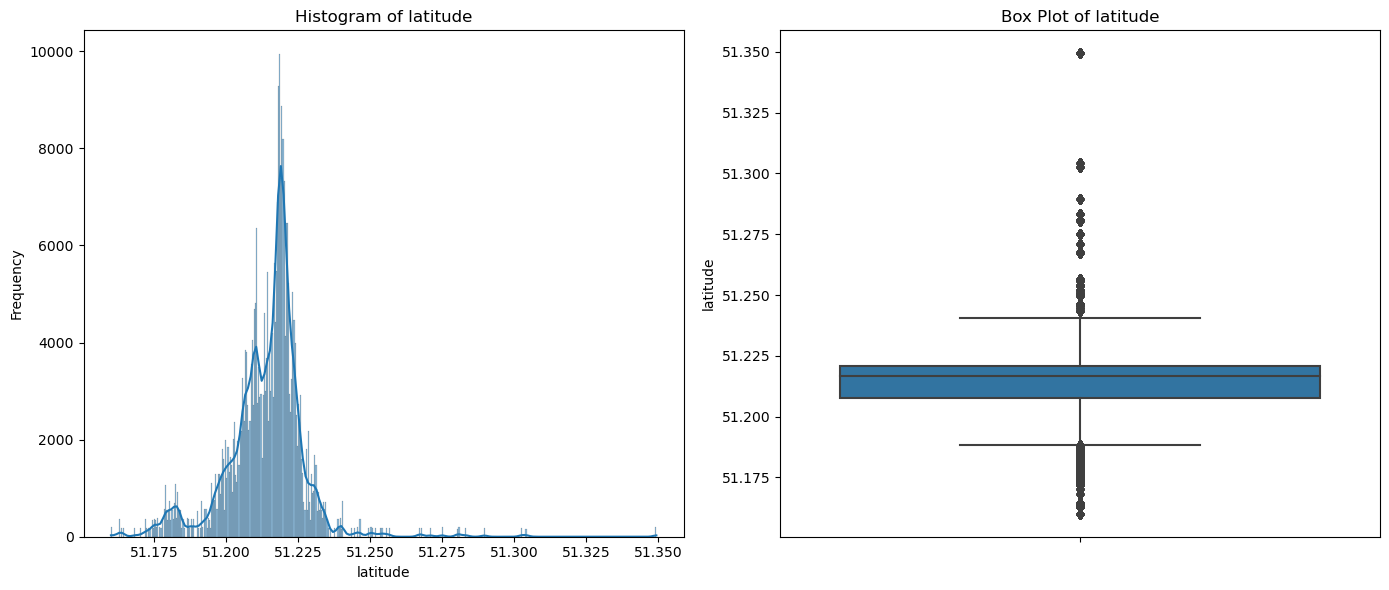

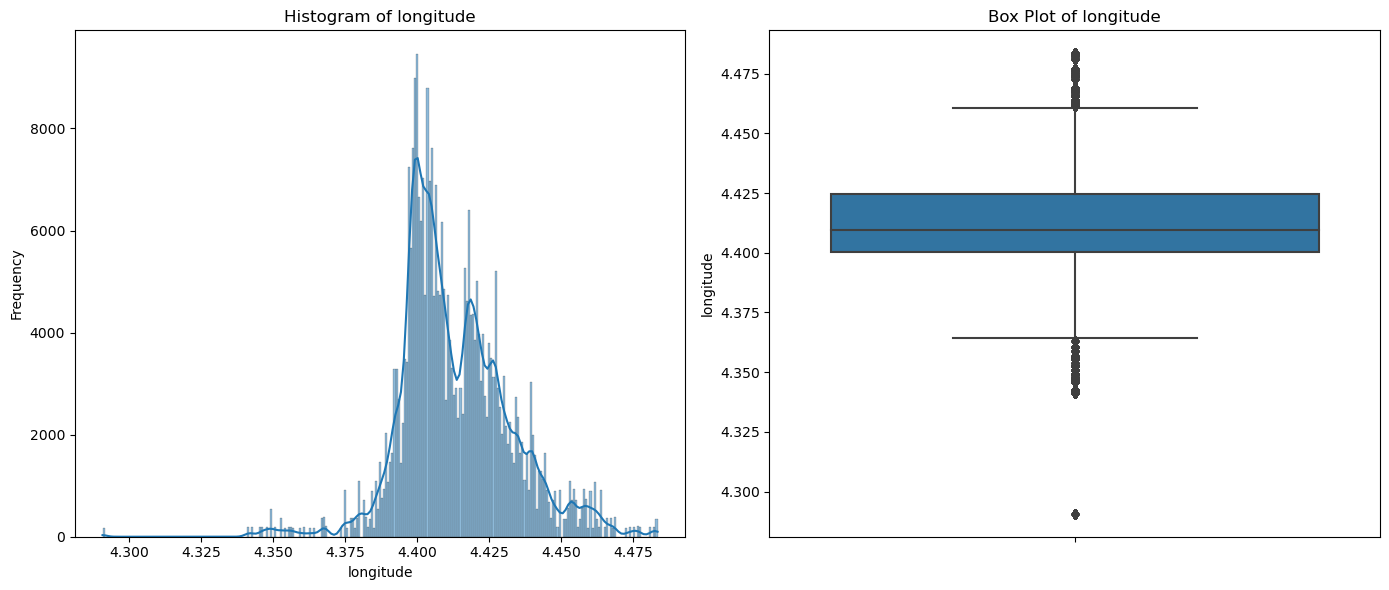

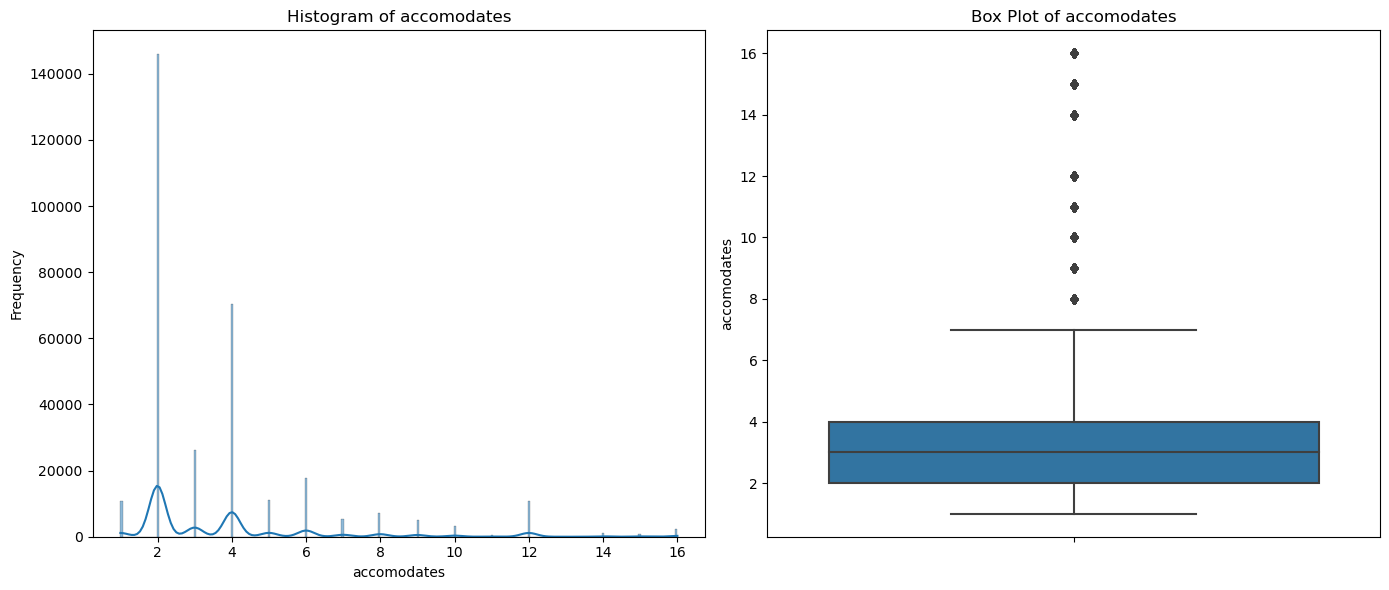

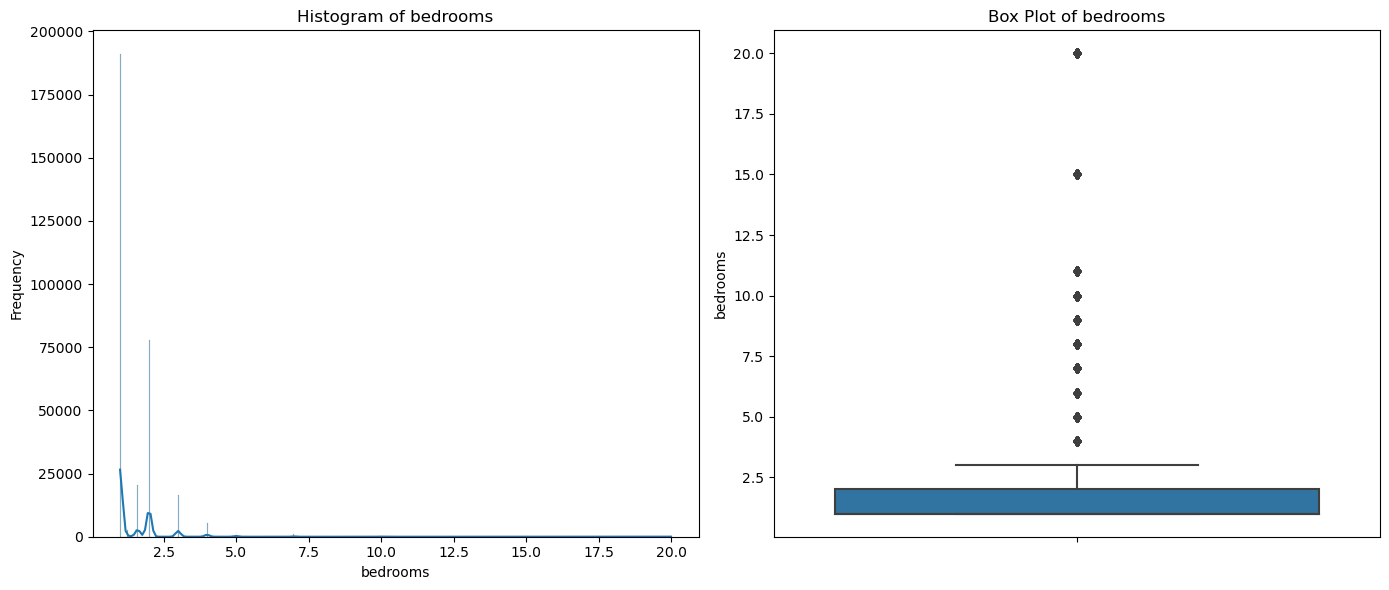

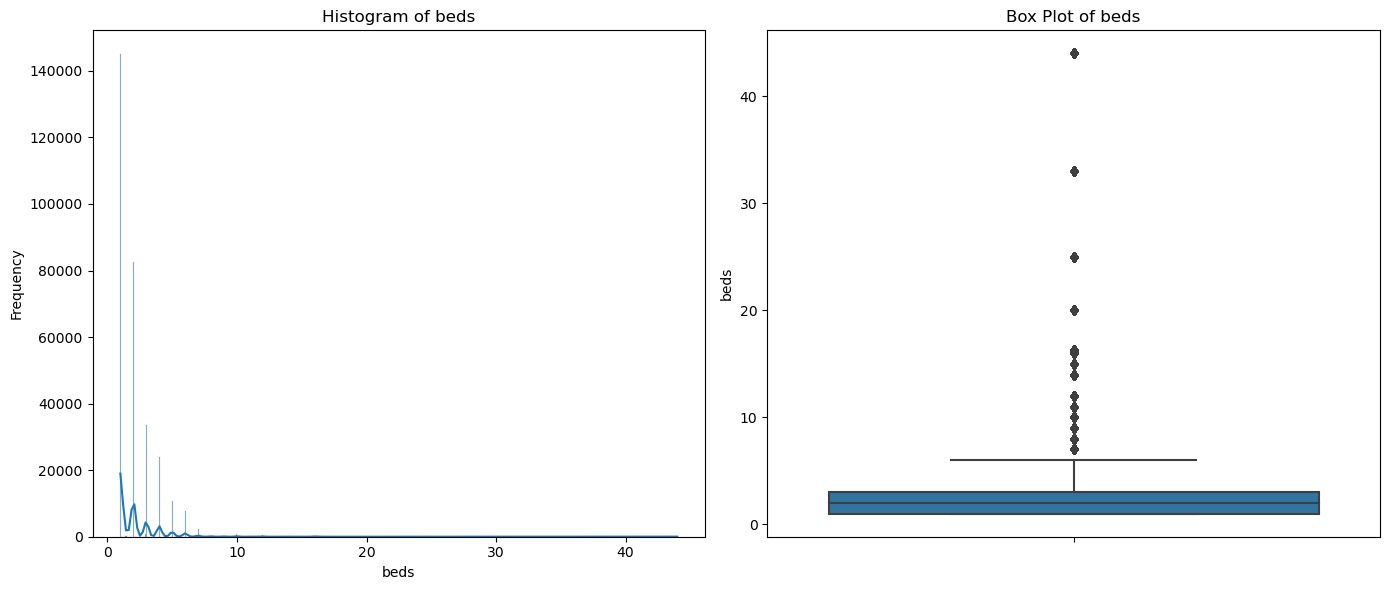

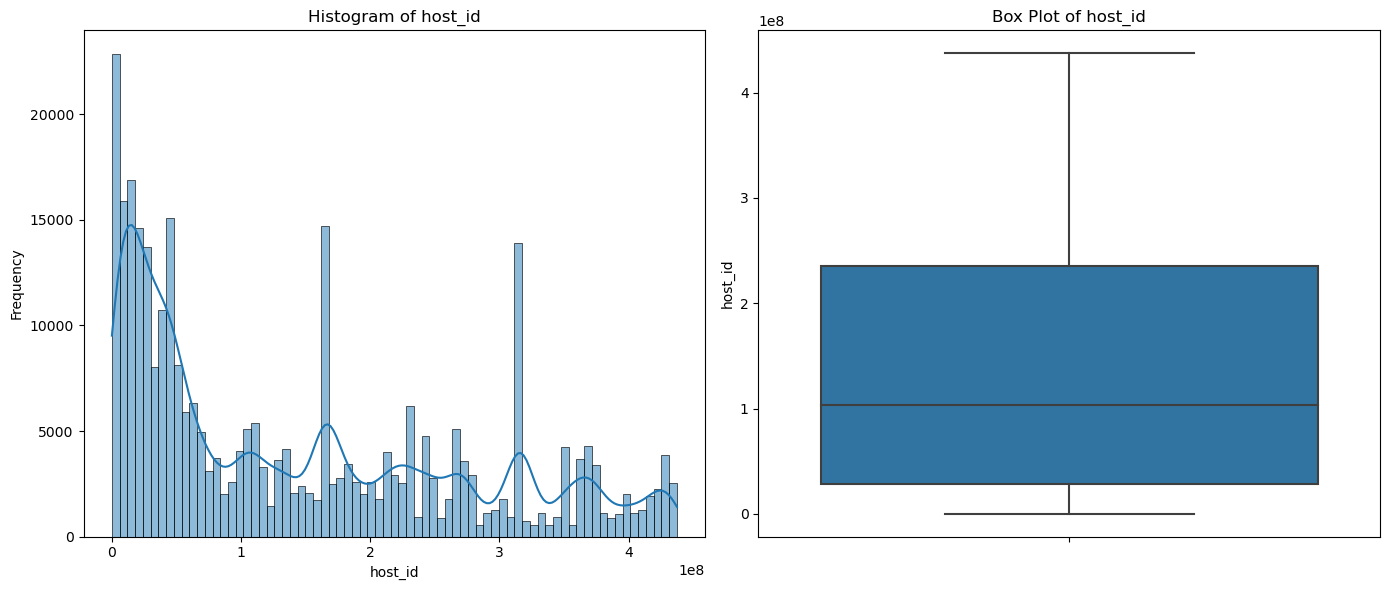

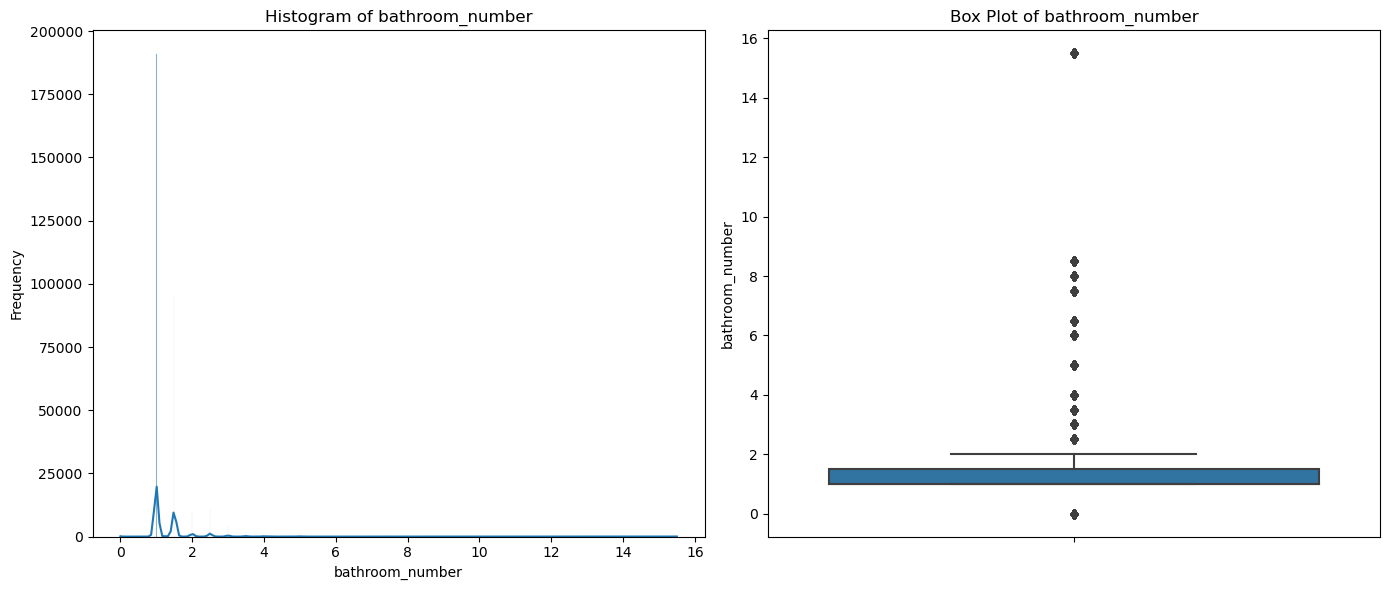

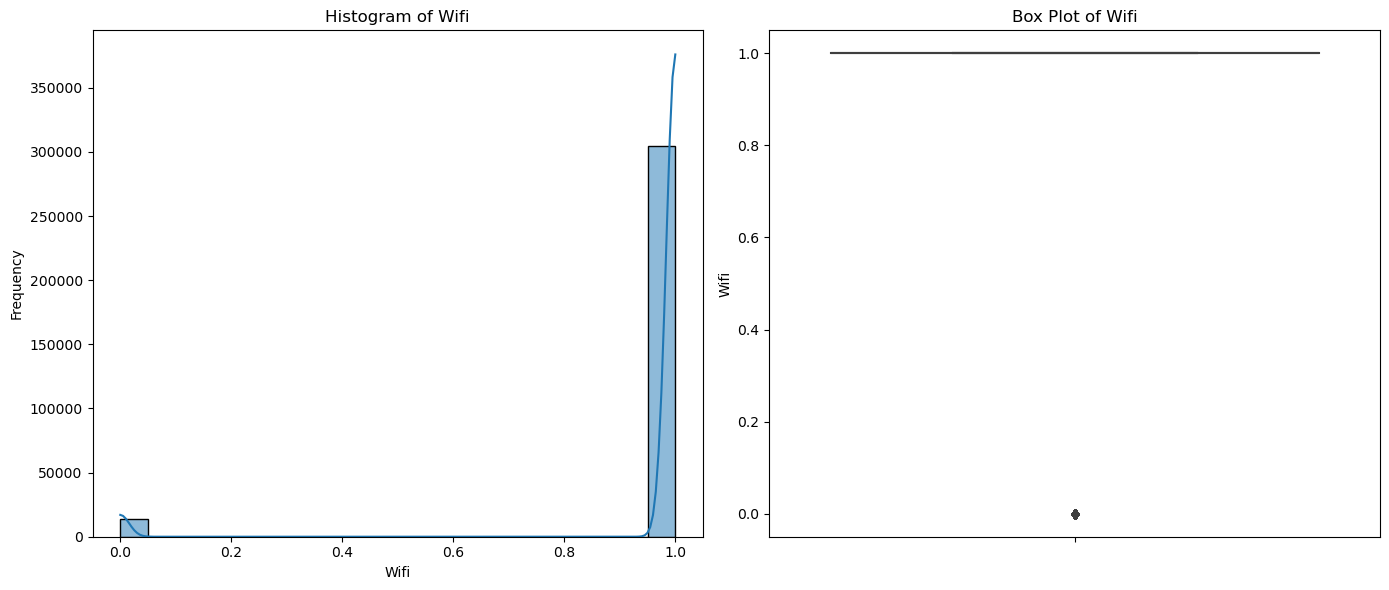

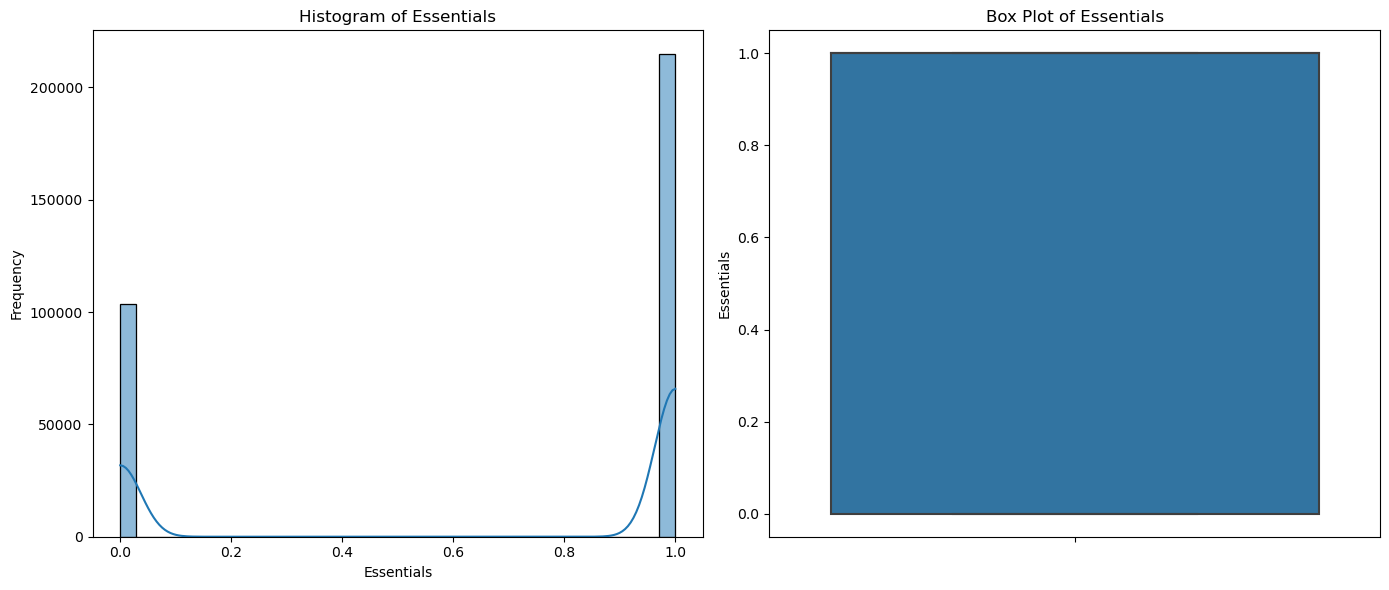

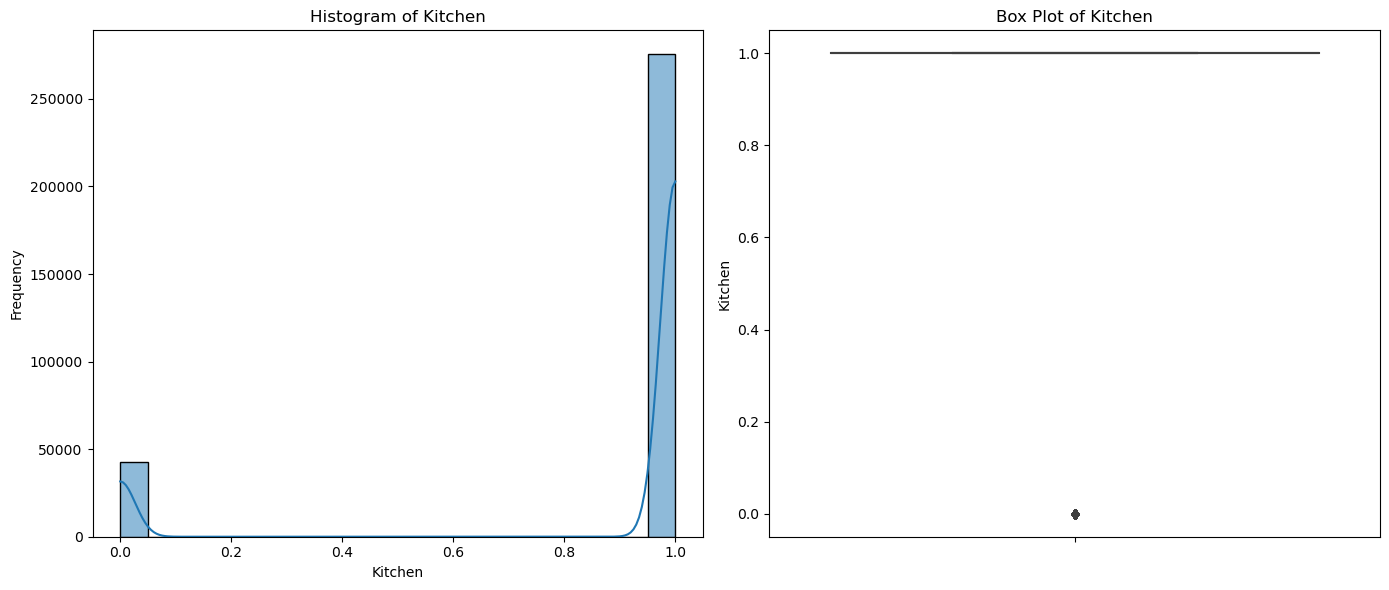

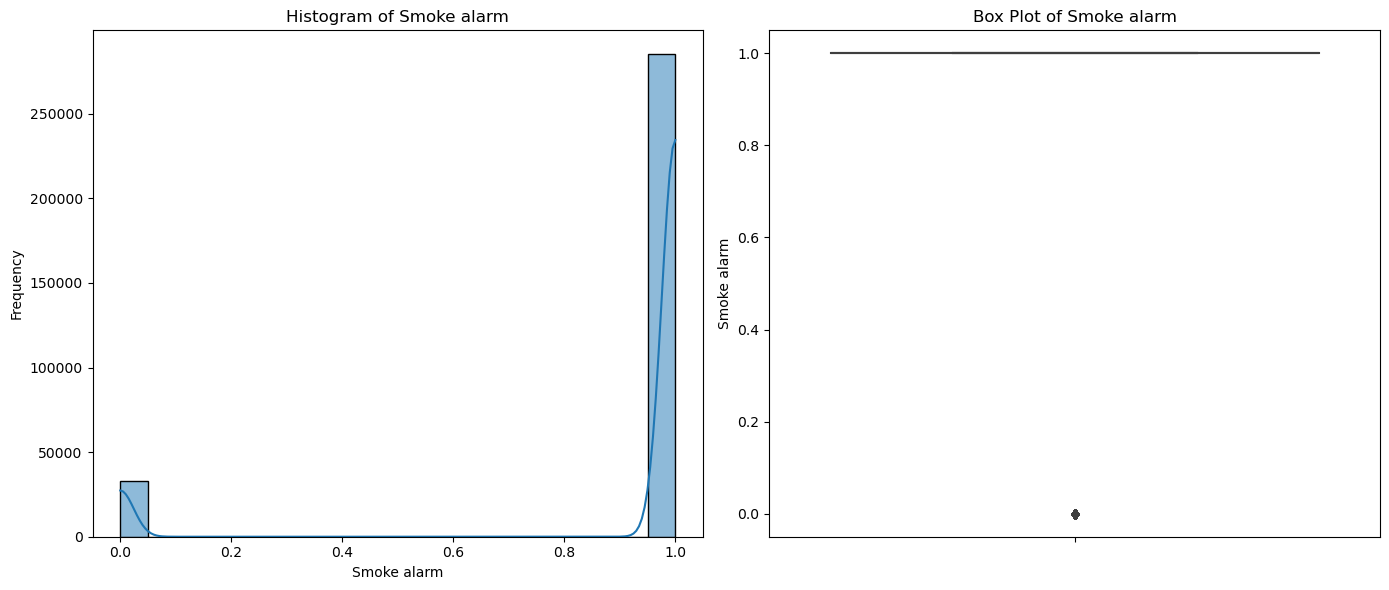

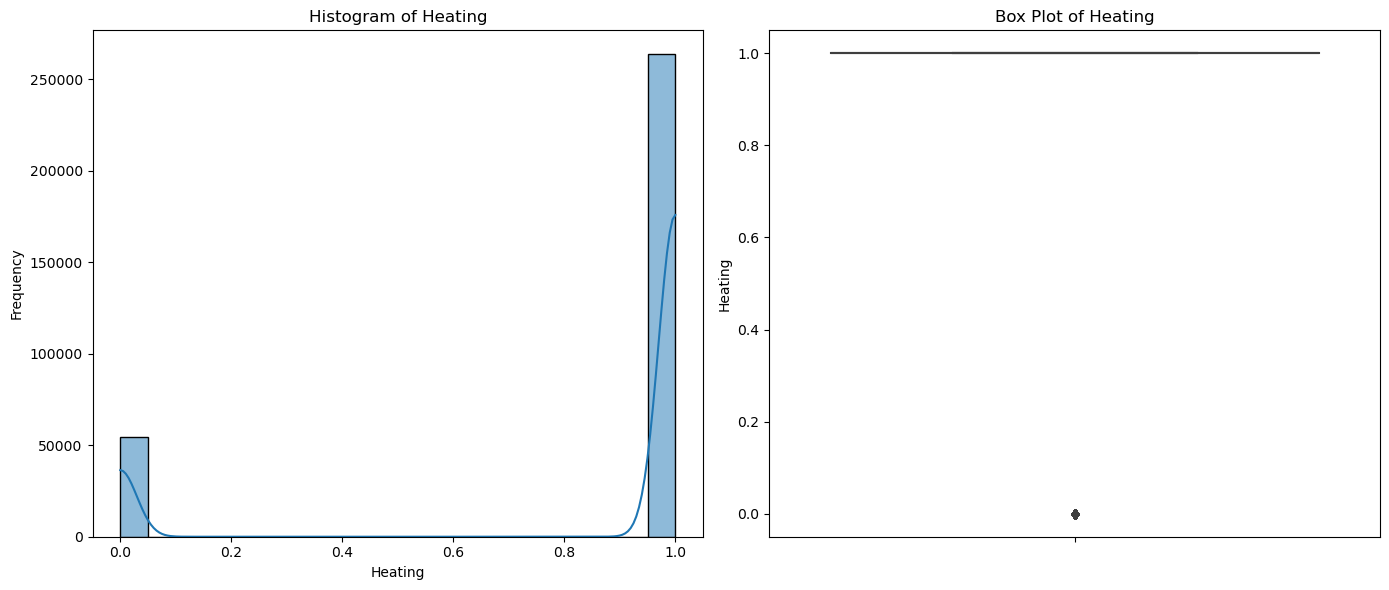

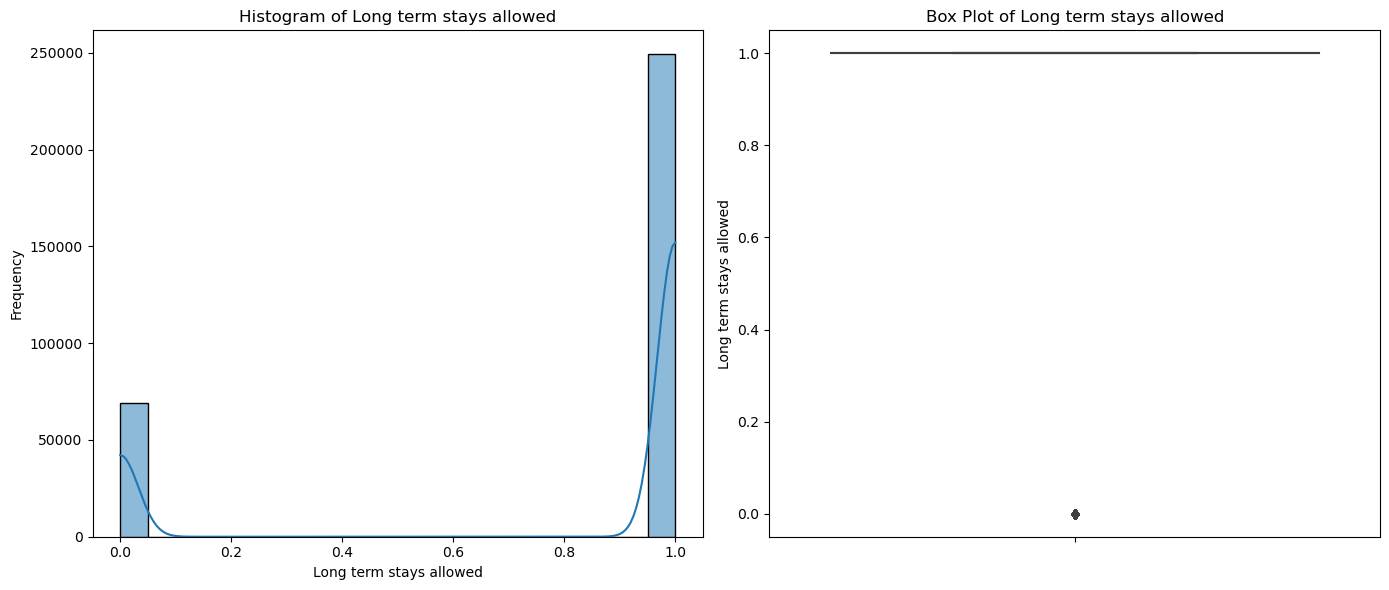

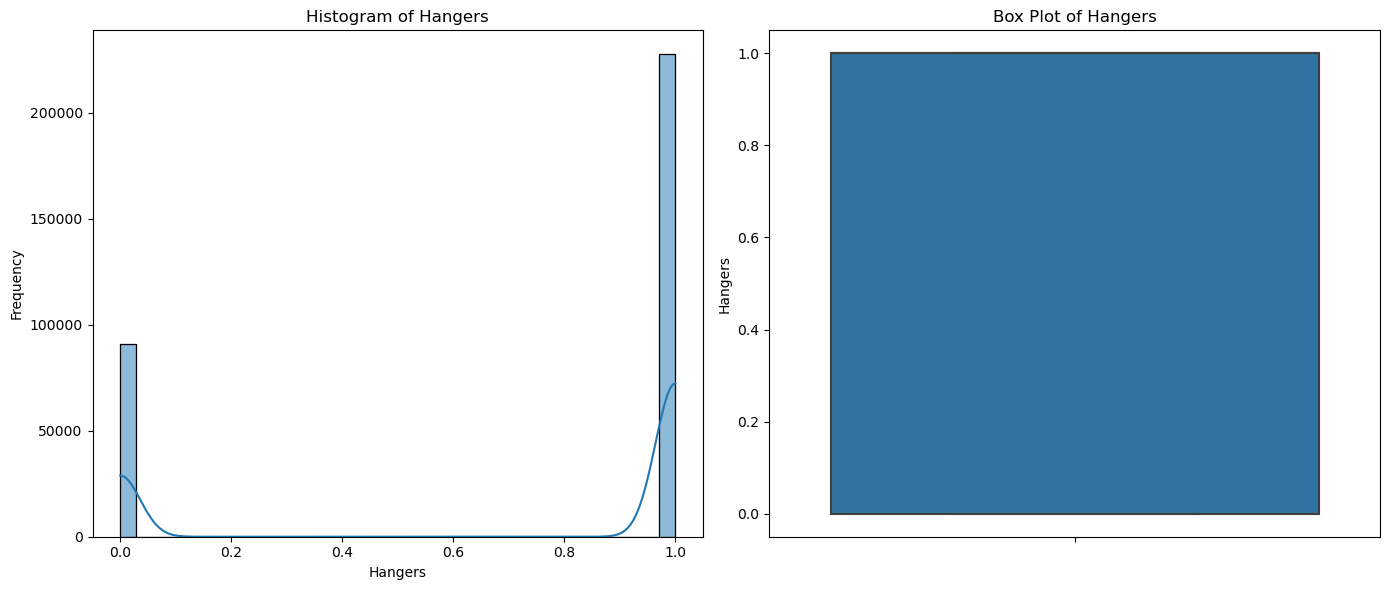

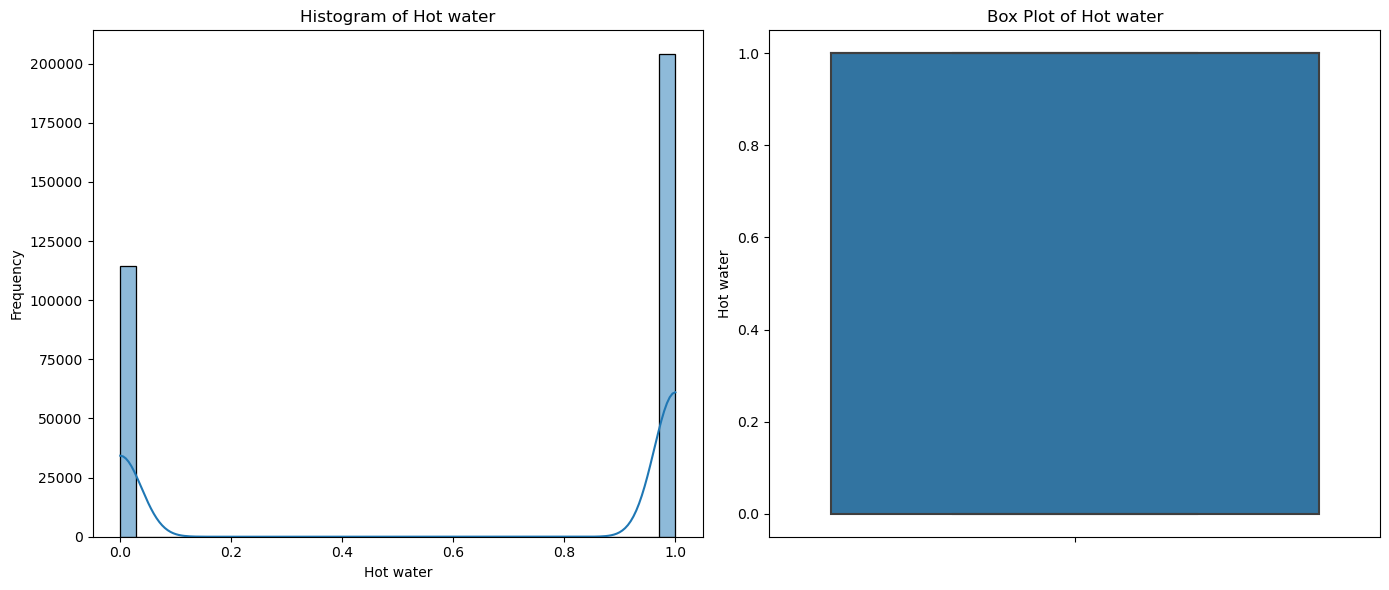

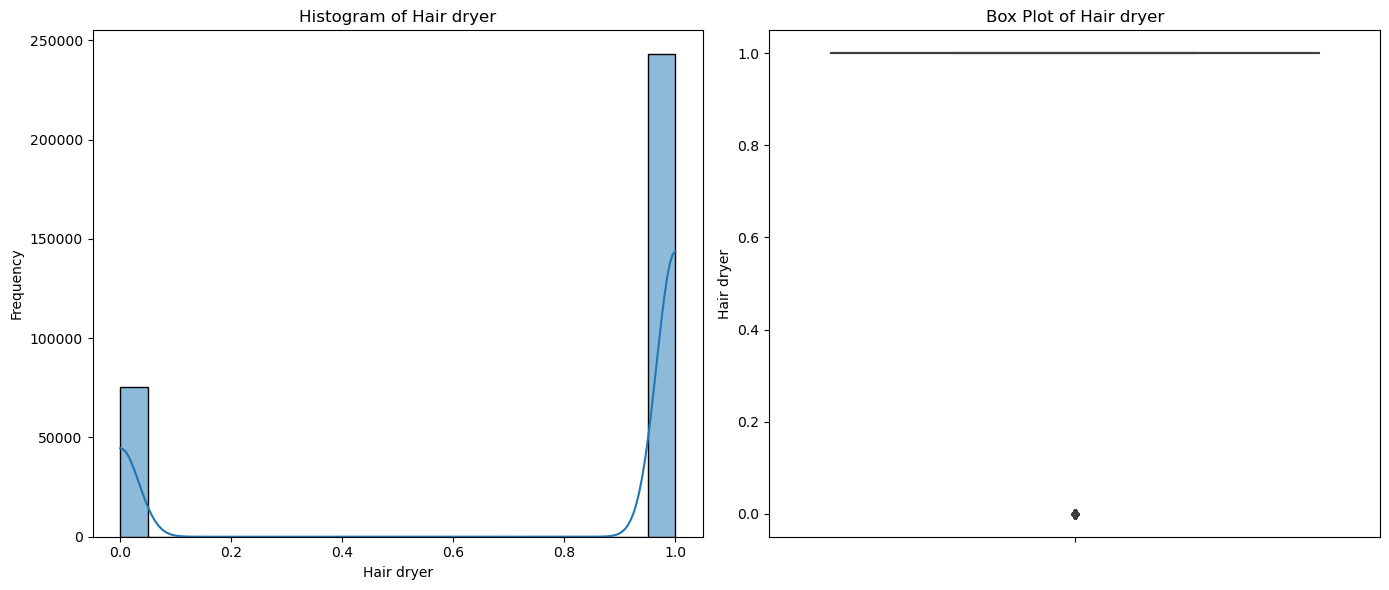

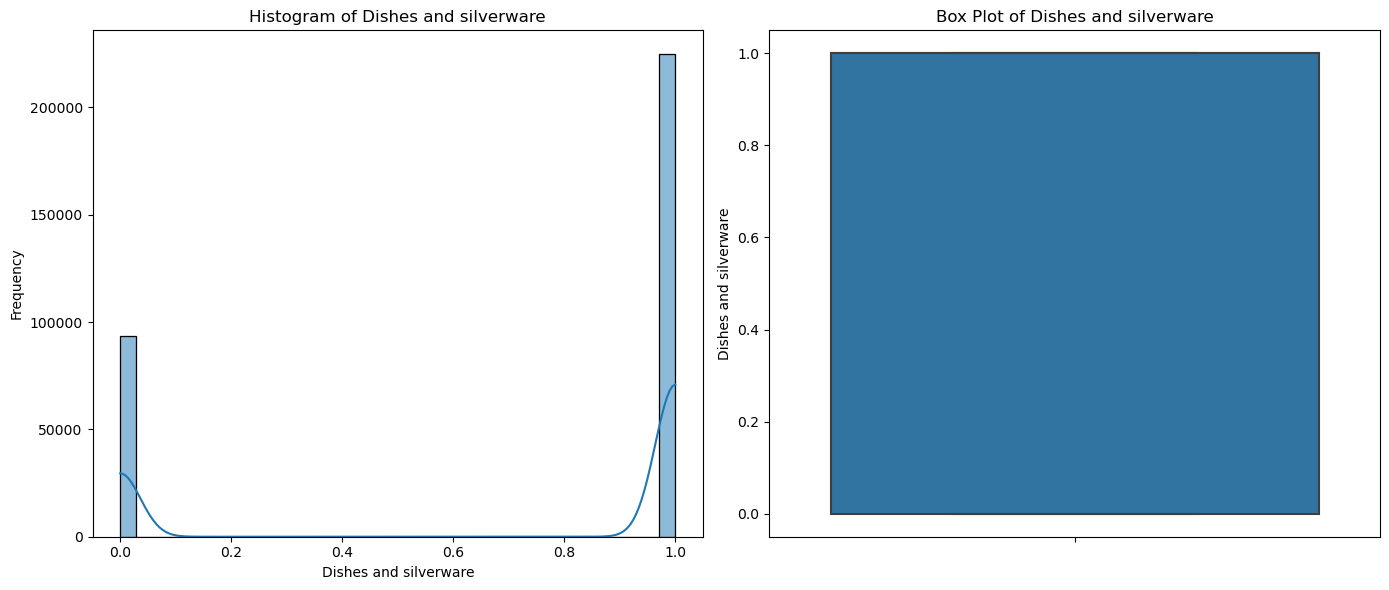

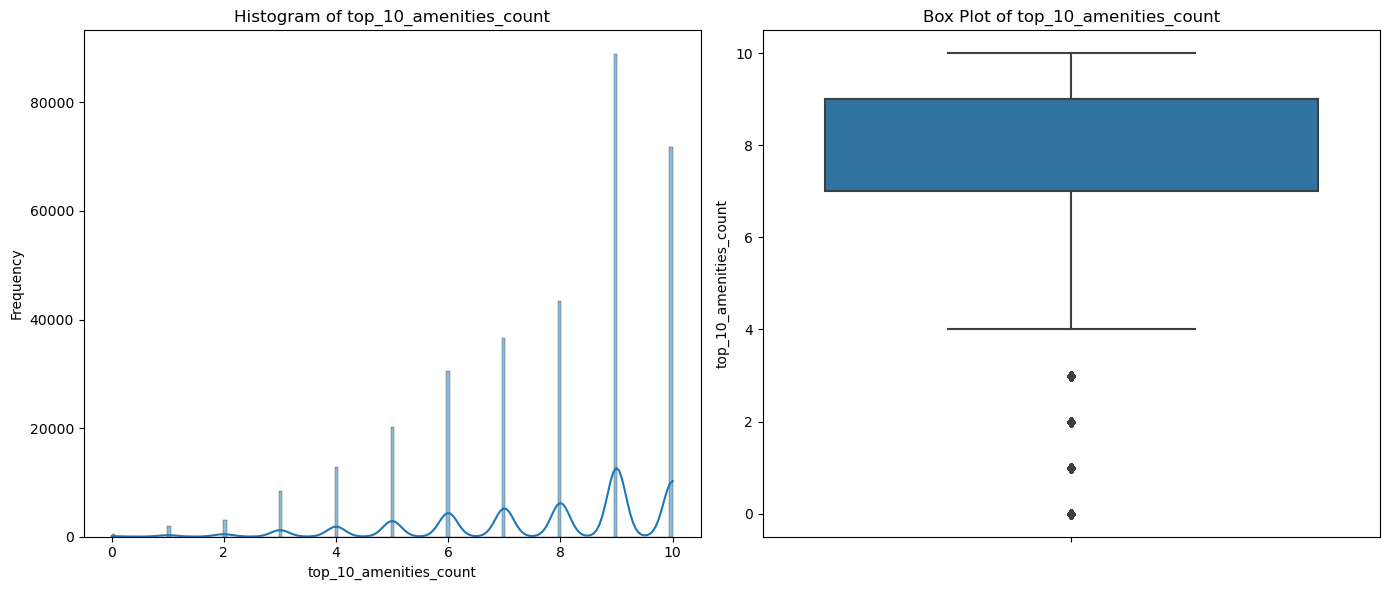

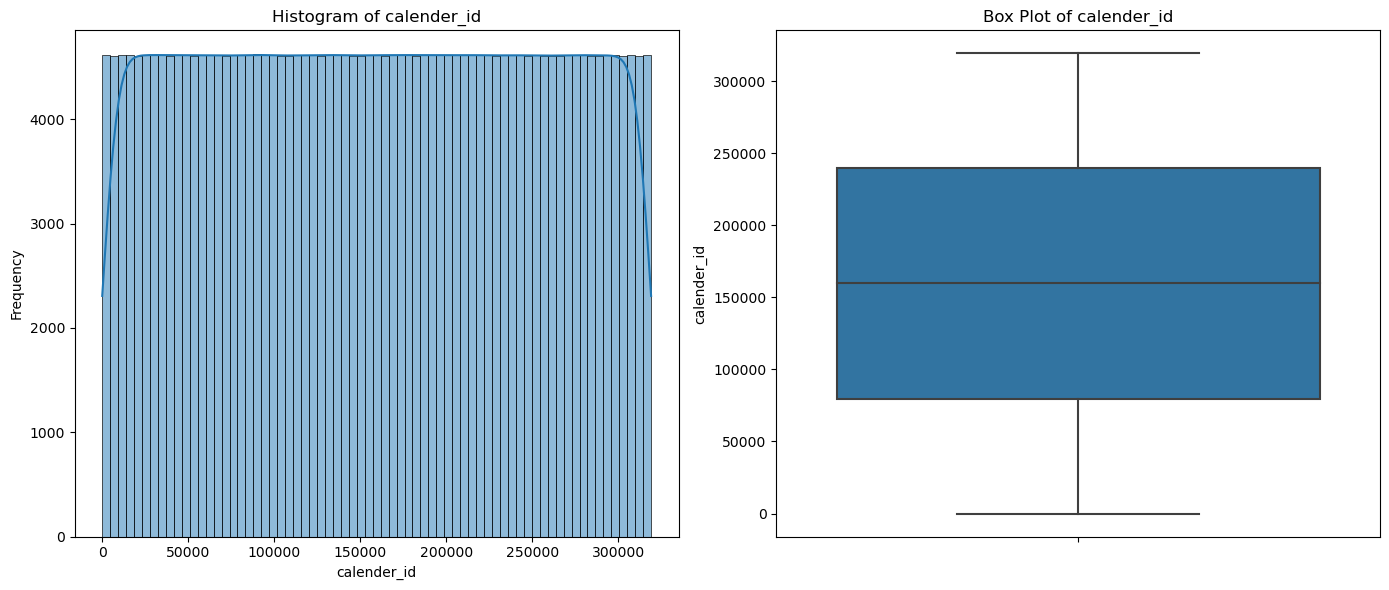

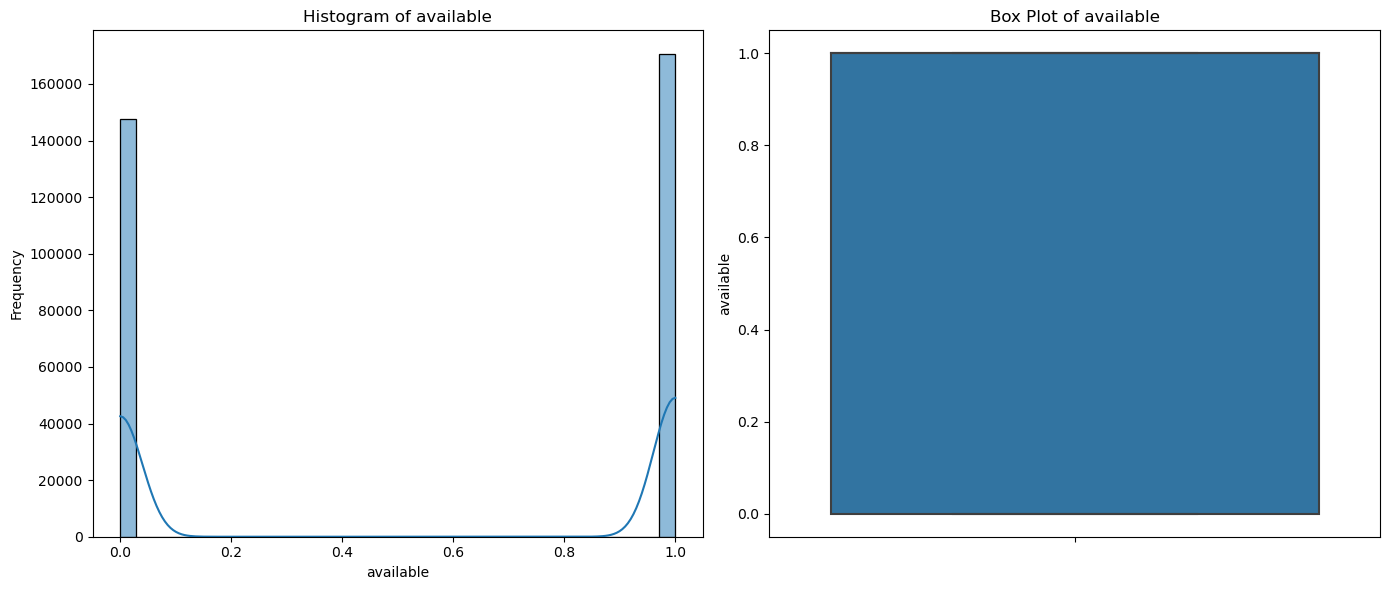

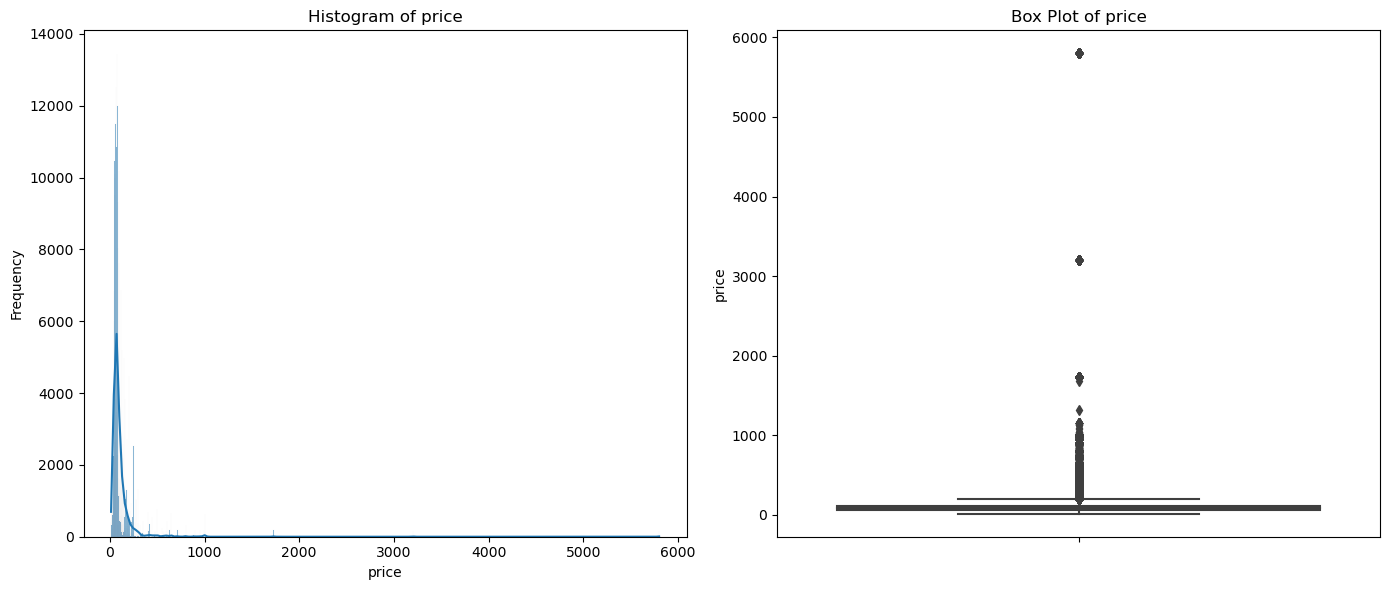

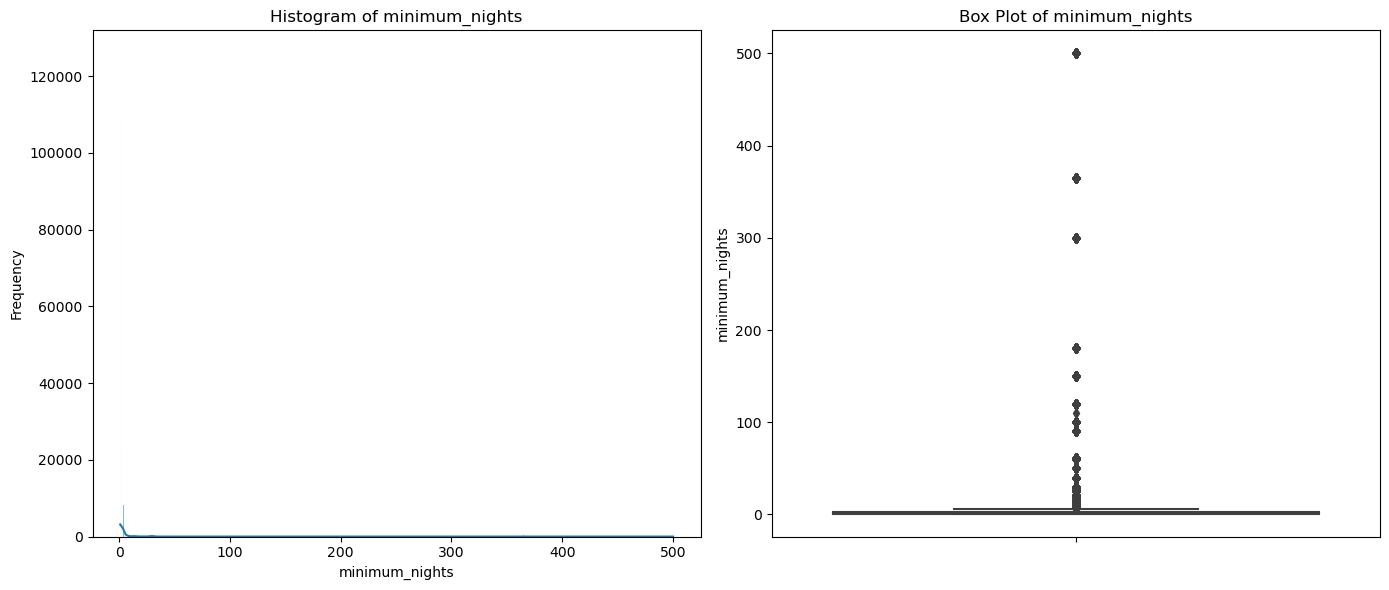

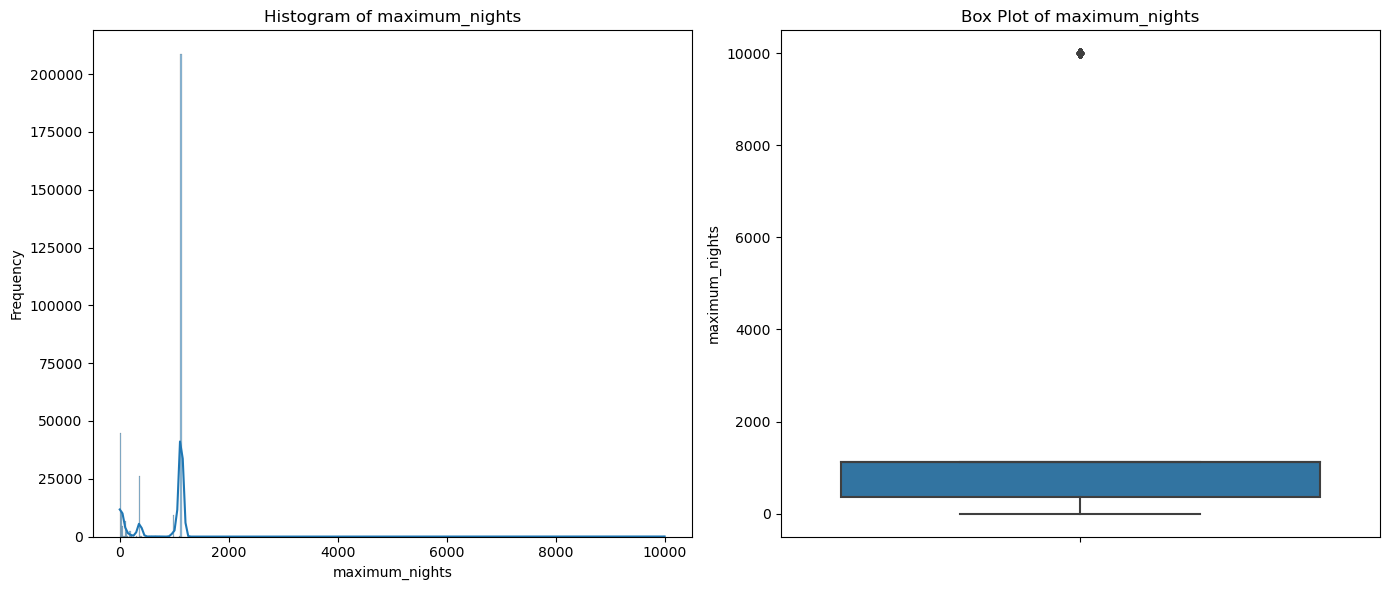

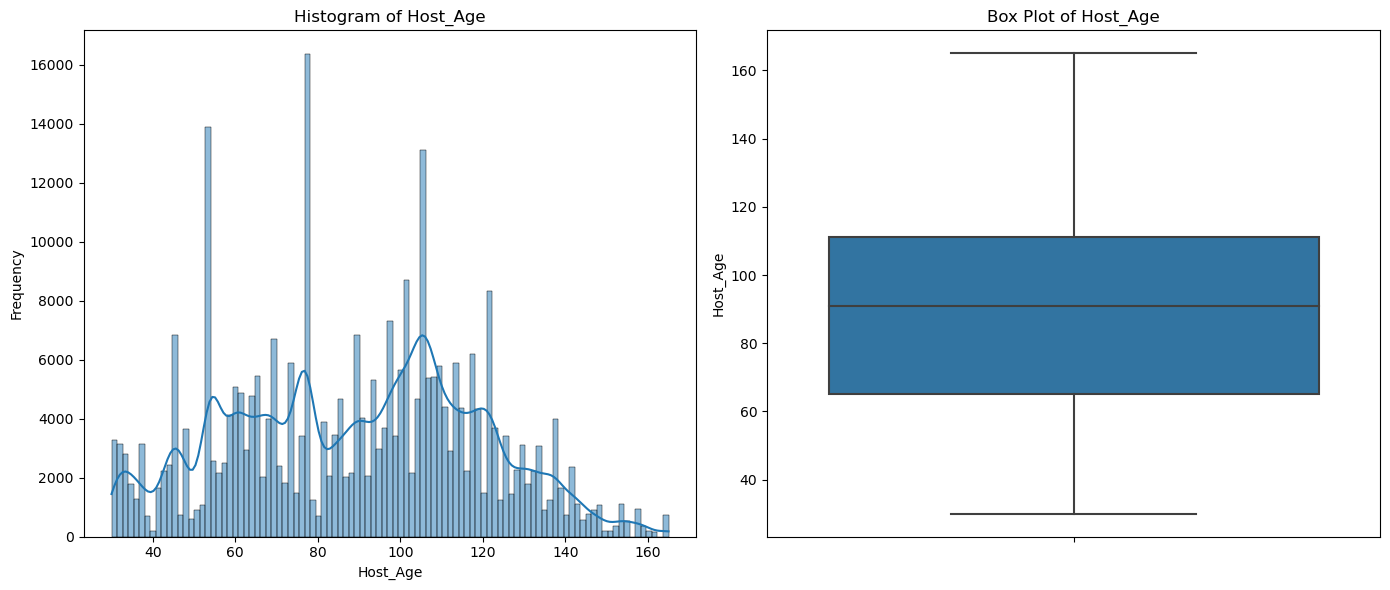

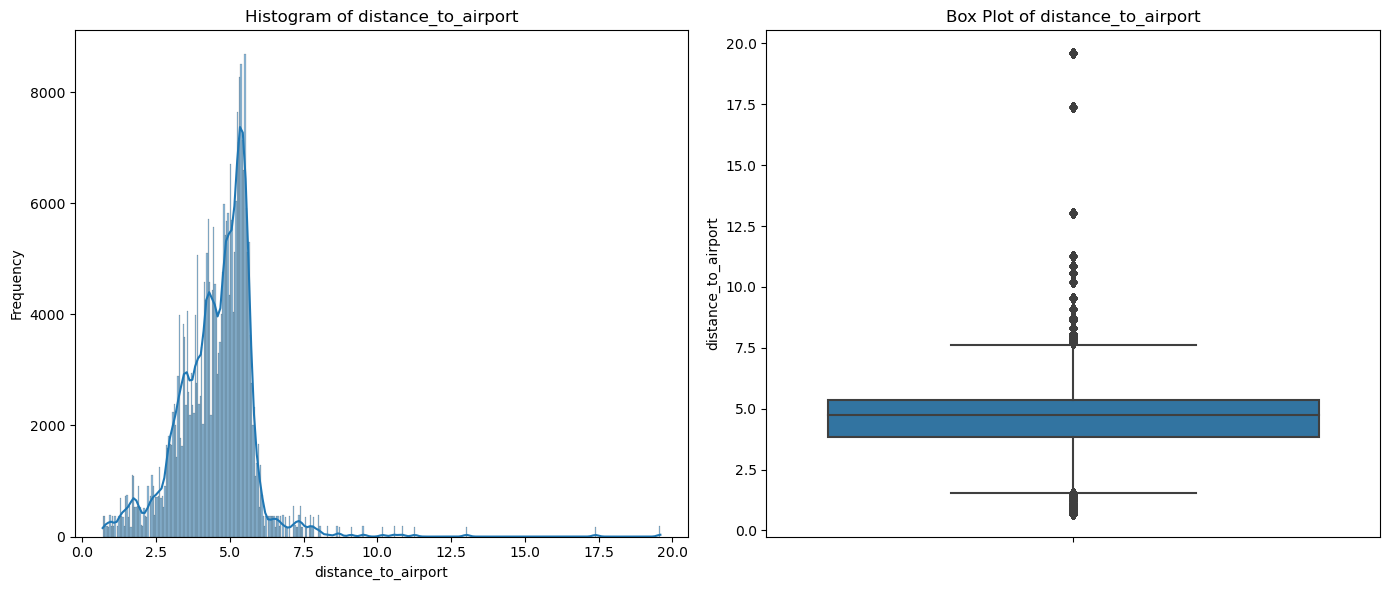

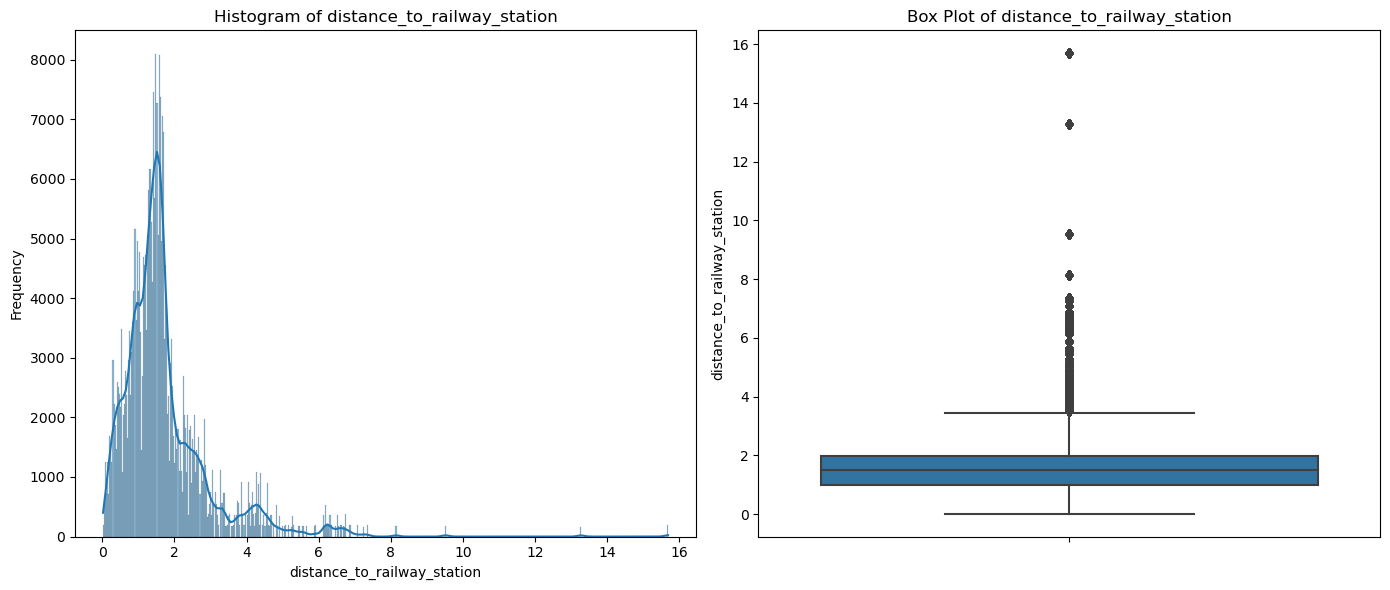

In [58]:
# List of numerical columns
numerical_columns = merged_df.select_dtypes(include=['number']).columns.tolist()

# Summary statistics
summary_stats = merged_df[numerical_columns].describe()
print(summary_stats)

# Histograms and box plots
for column in numerical_columns:
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(merged_df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=merged_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

#### Plot barplots for categorical variables

Frequency distribution of property_type:
property_type
Entire rental unit                     178533
Entire loft                             19933
Private room in rental unit             18728
Entire condominium (condo)              18599
Private room in residential home        14486
Entire townhouse                        12918
Private room in townhouse               12014
Entire residential home                 10738
Private room in bed and breakfast        4963
Room in aparthotel                       4448
Entire serviced apartment                4364
Room in boutique hotel                   4165
Private room in condominium (condo)      2342
Room in hotel                            2192
Entire guest suite                       1129
Private room in loft                     1090
Private room in guesthouse                936
Private room                              758
Shared room in residential home           563
Private room in casa particular           561
Private room in guest sui

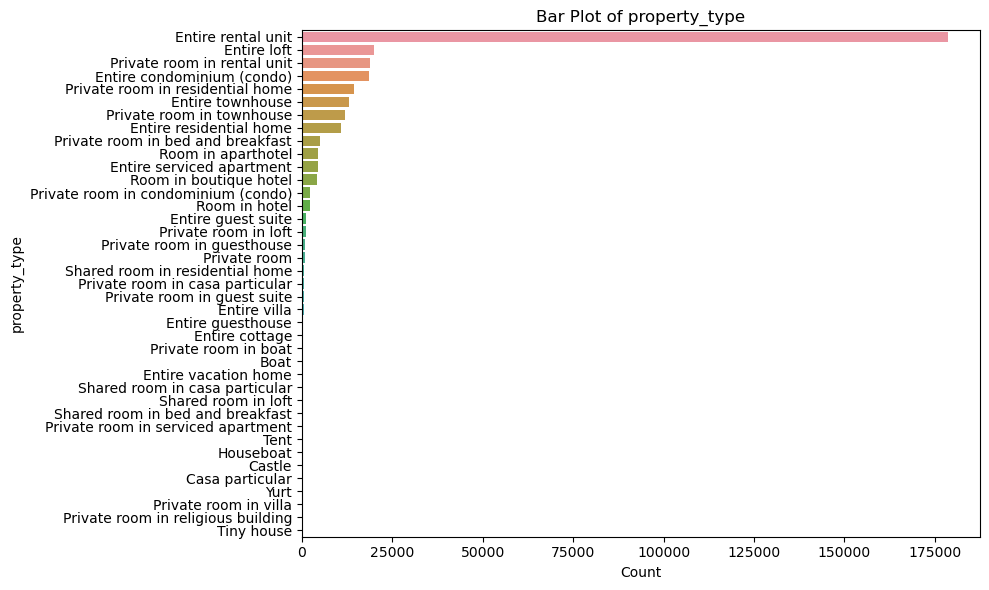

Frequency distribution of room_type:
room_type
Entire home/apt    250811
Private room        64418
Hotel room           1858
Shared room          1138
Name: count, dtype: int64



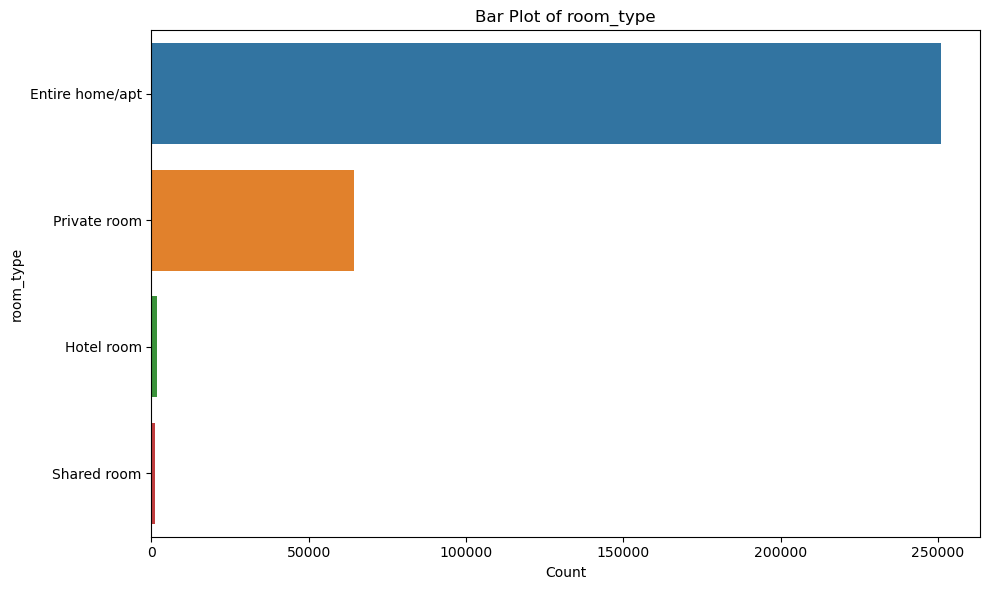

Frequency distribution of bathroom_type:
bathroom_type
bath            150140
baths           111612
shared bath      21423
private bath     19198
shared baths     14743
half-bath         1109
Name: count, dtype: int64



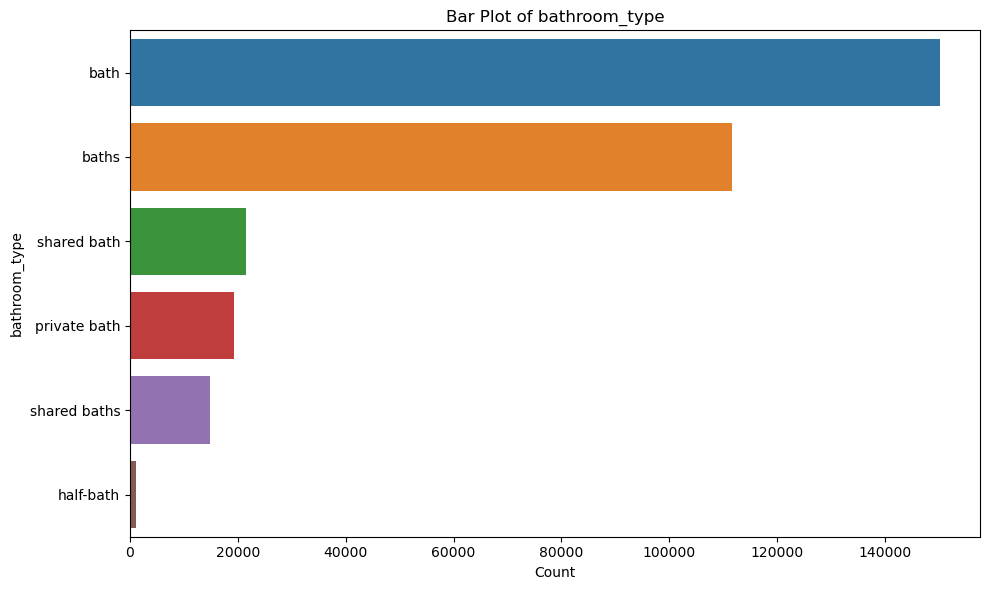

In [59]:
# List of categorical columns
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Frequency distribution and bar plots
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Frequency distribution
    frequency_distribution = merged_df[column].value_counts()
    print(f'Frequency distribution of {column}:\n{frequency_distribution}\n')
    
    # Bar plot
    sns.countplot(y=merged_df[column], order=frequency_distribution.index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()


#### Plot bivariate relationships using Scatterplot

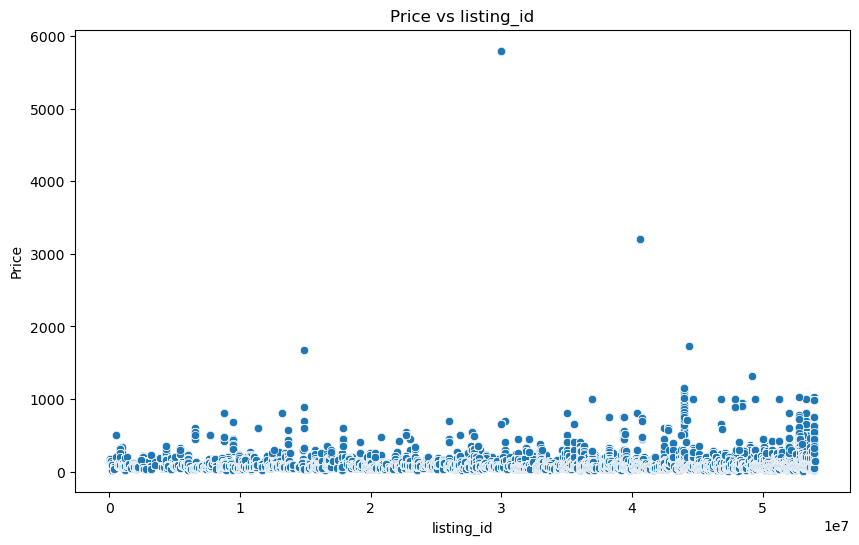

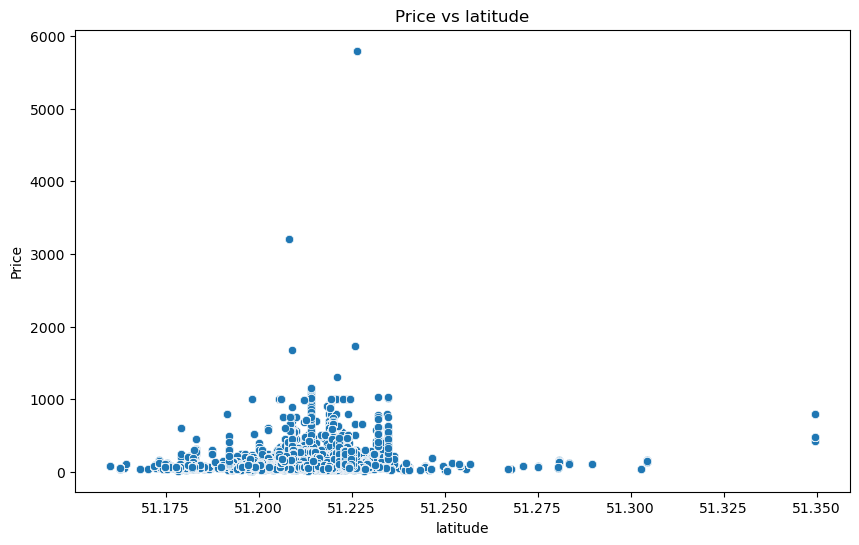

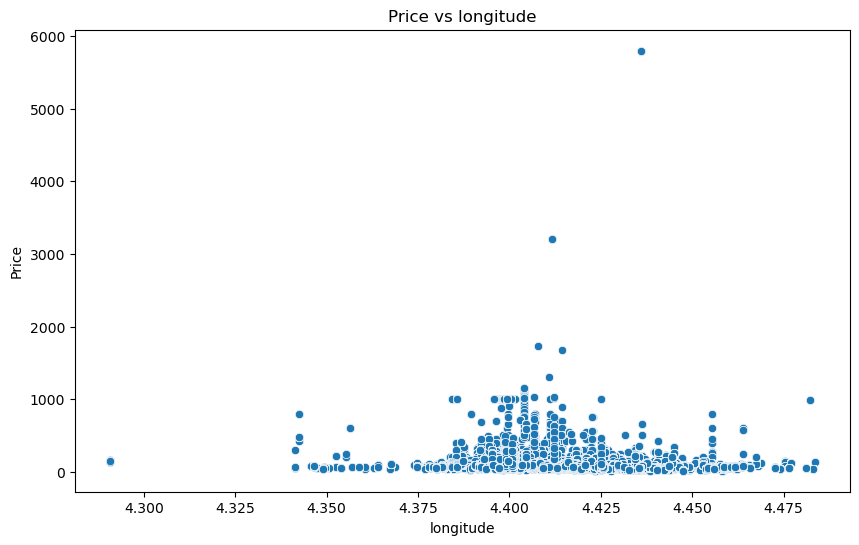

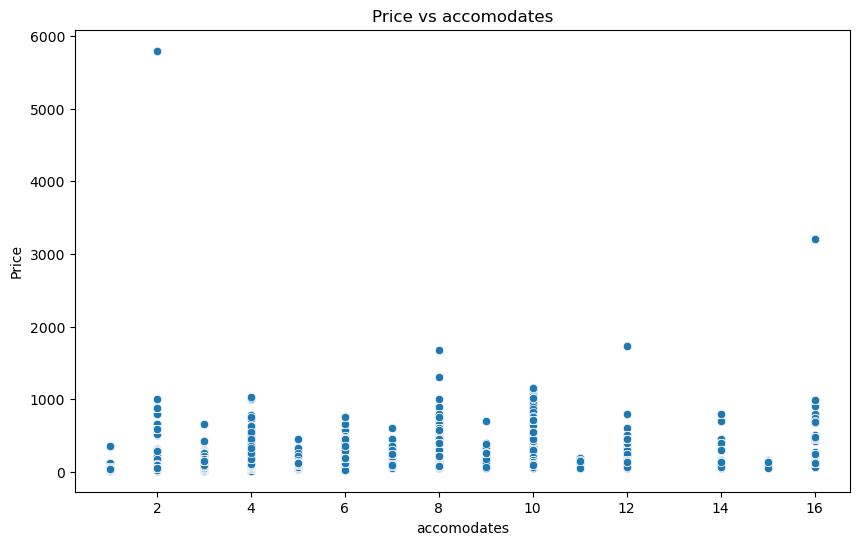

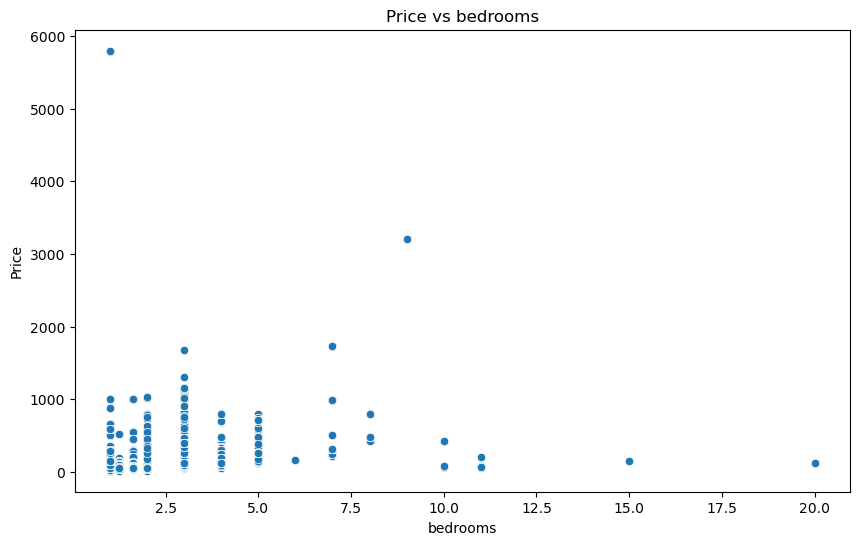

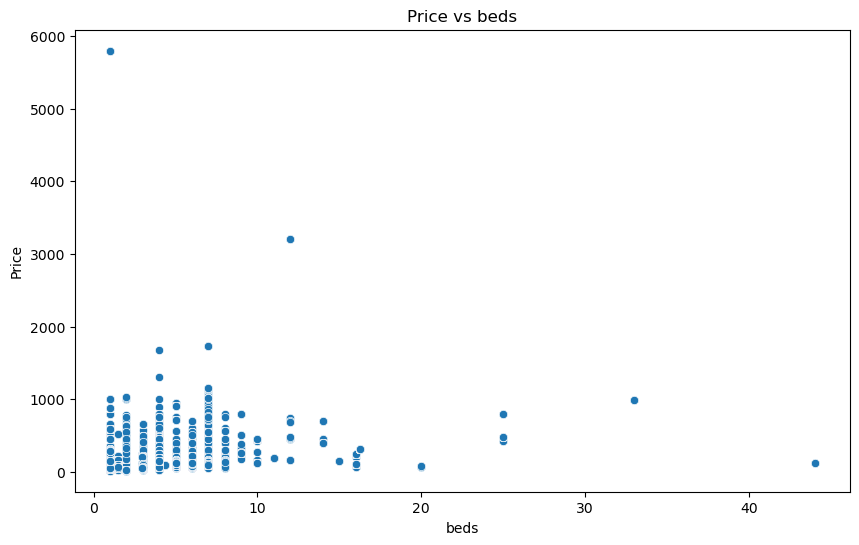

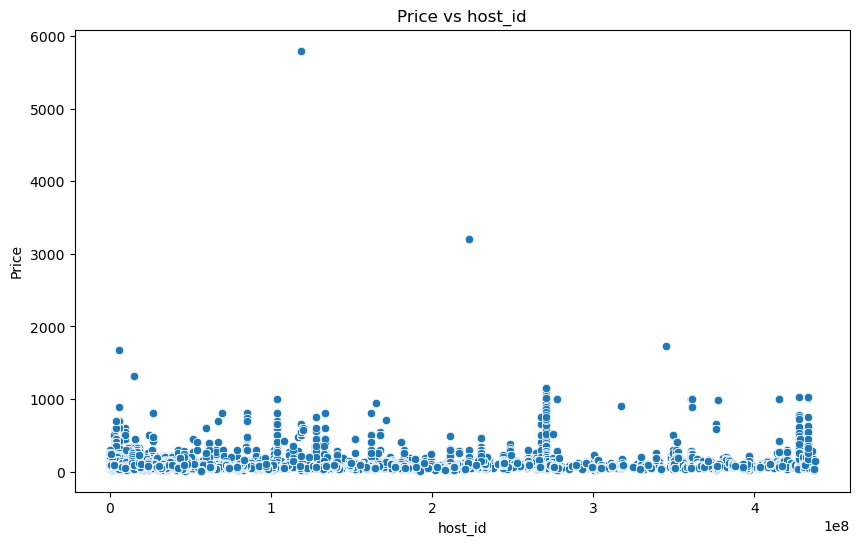

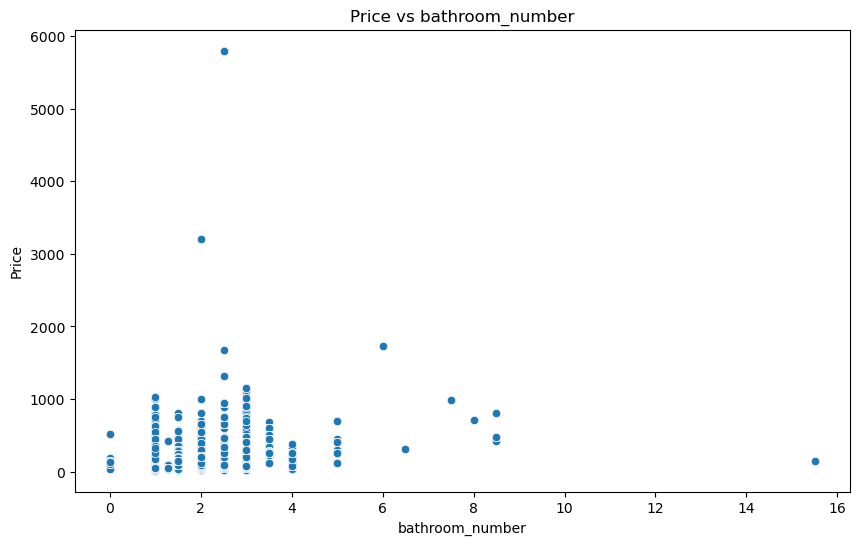

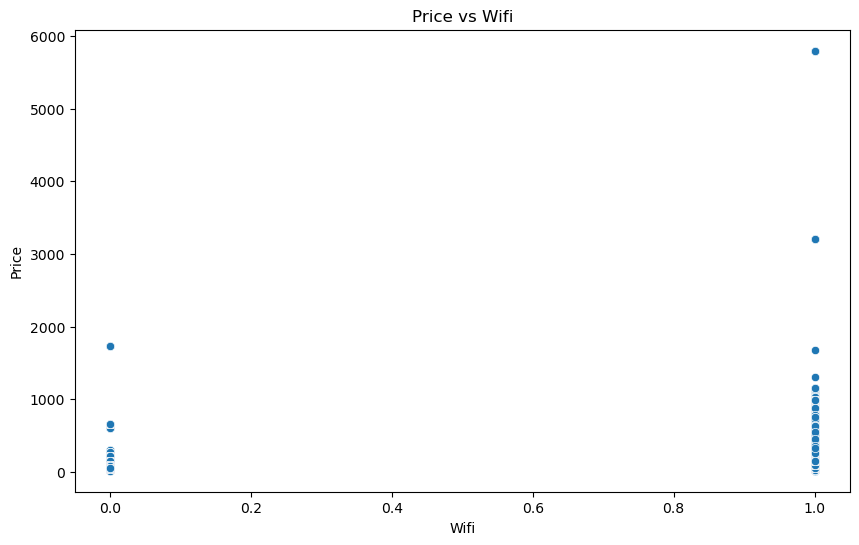

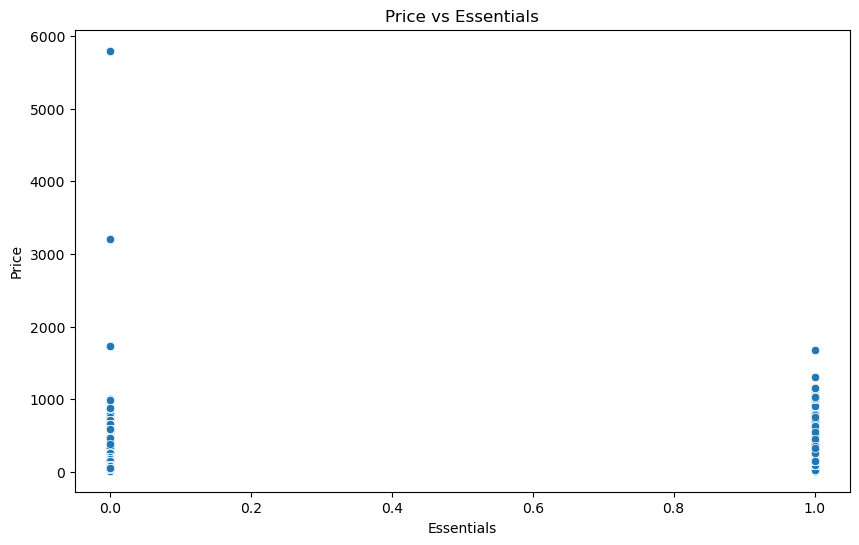

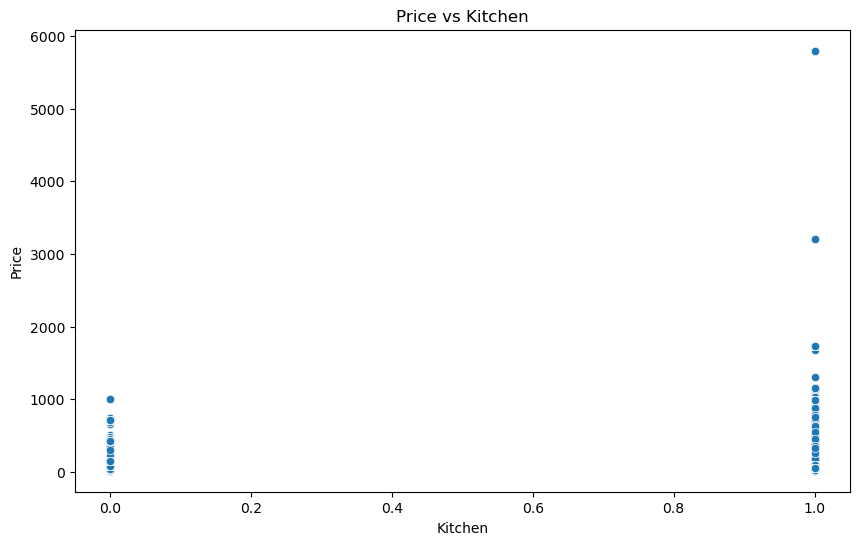

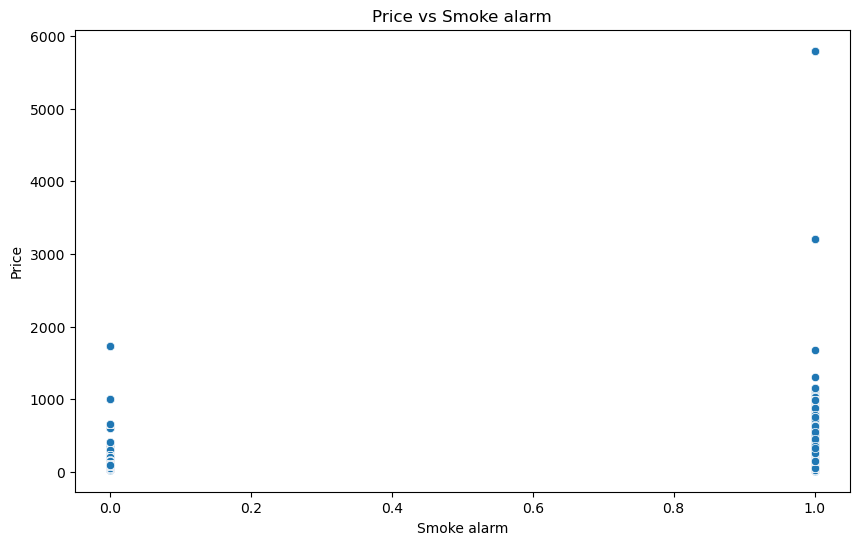

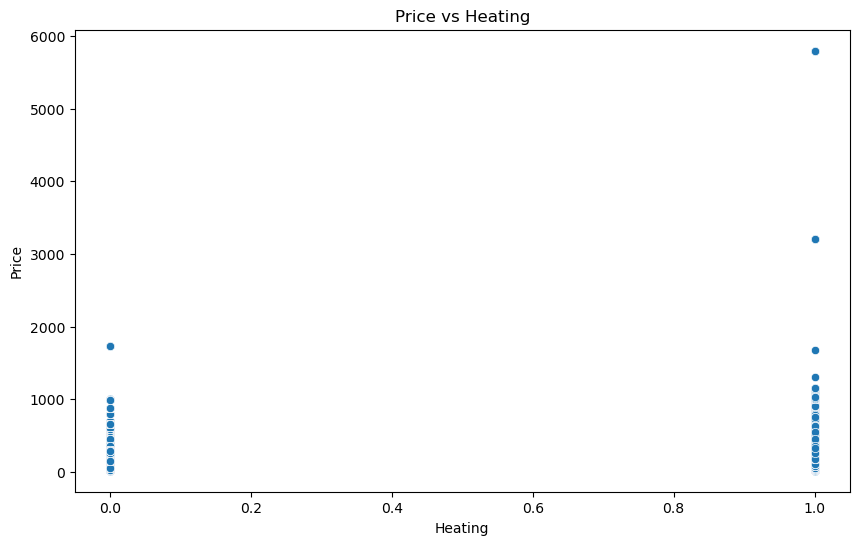

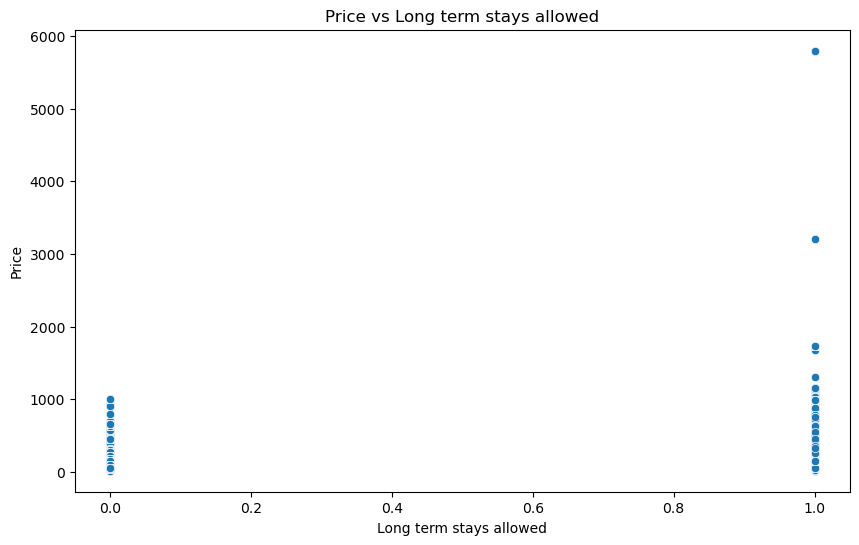

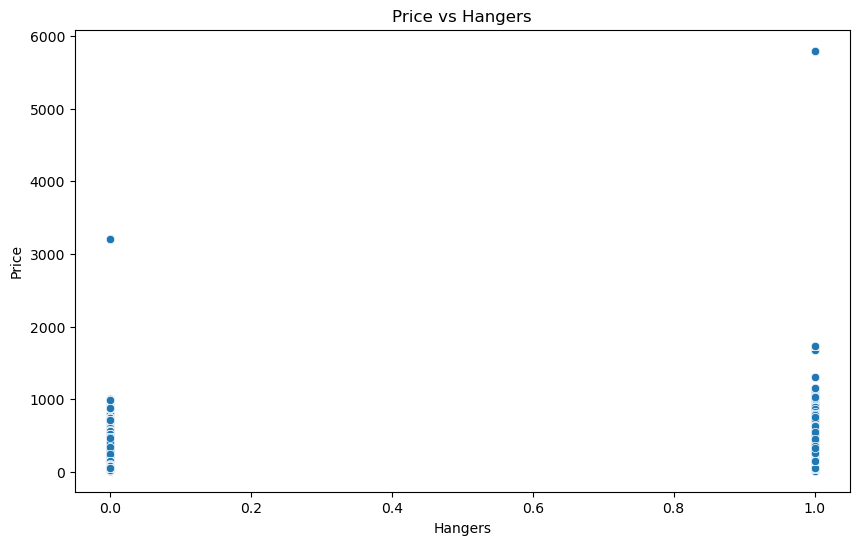

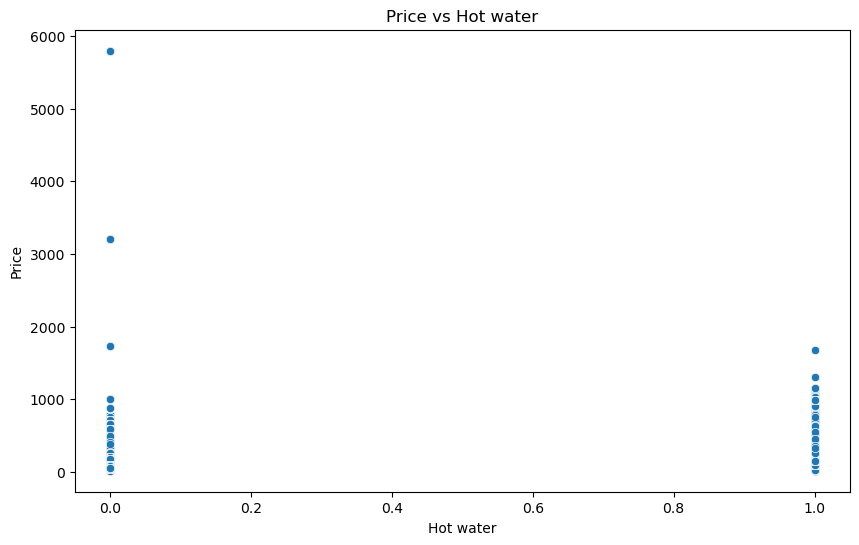

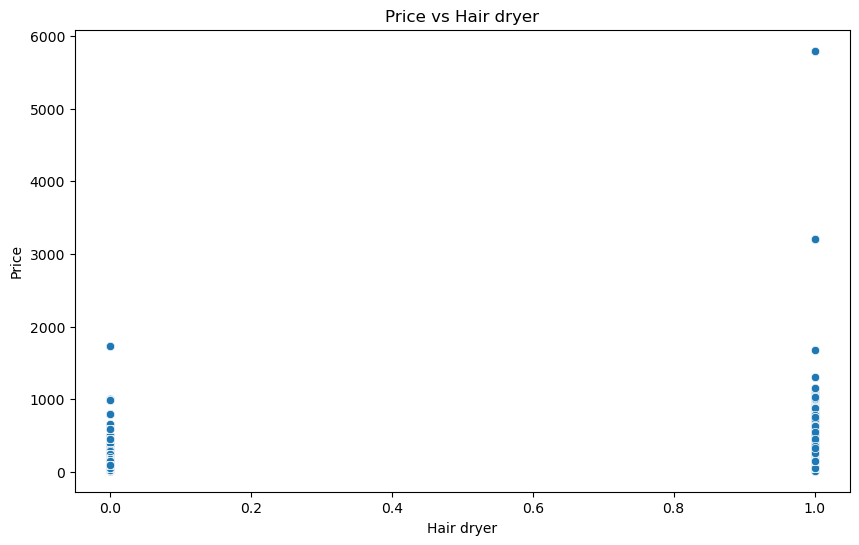

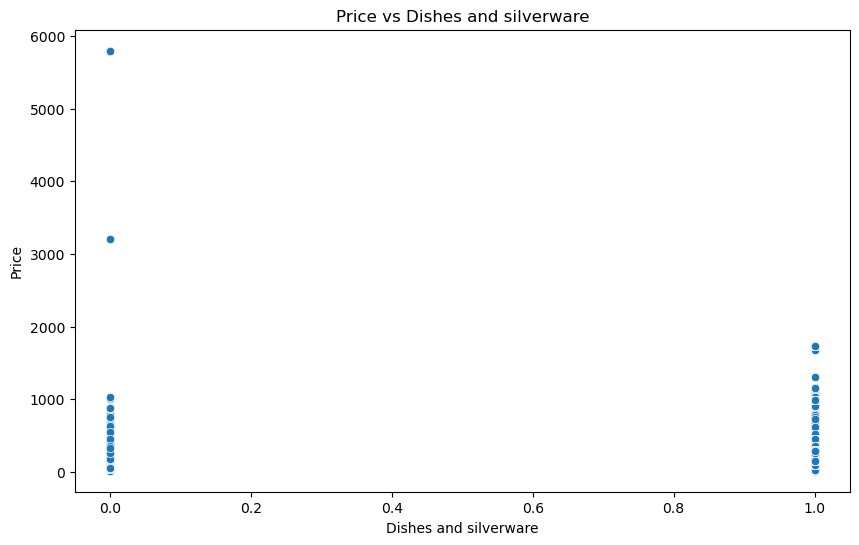

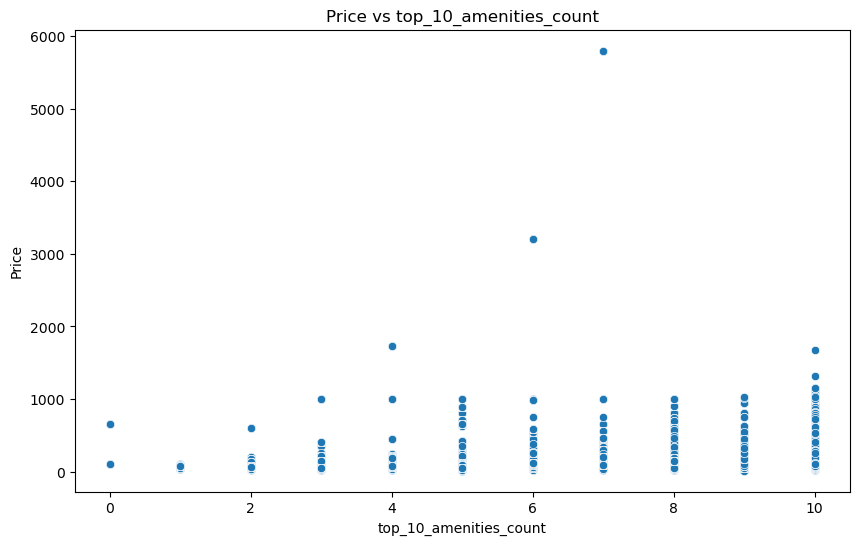

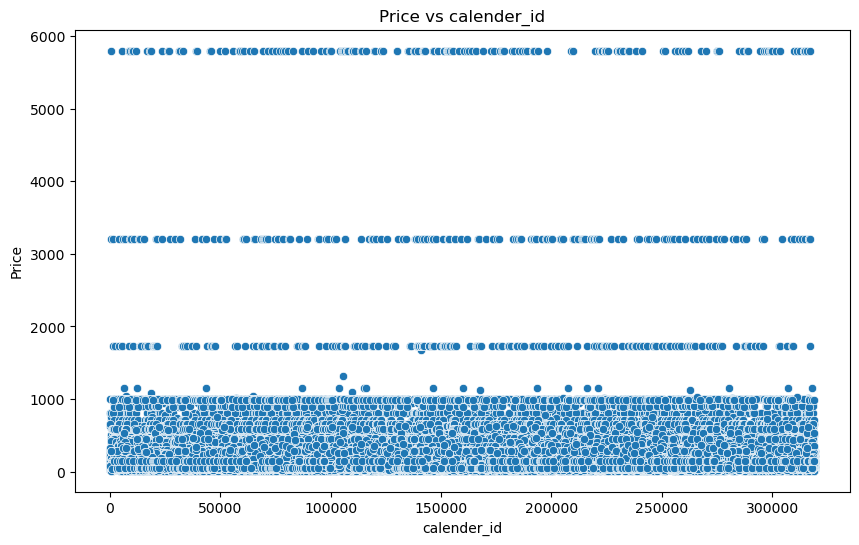

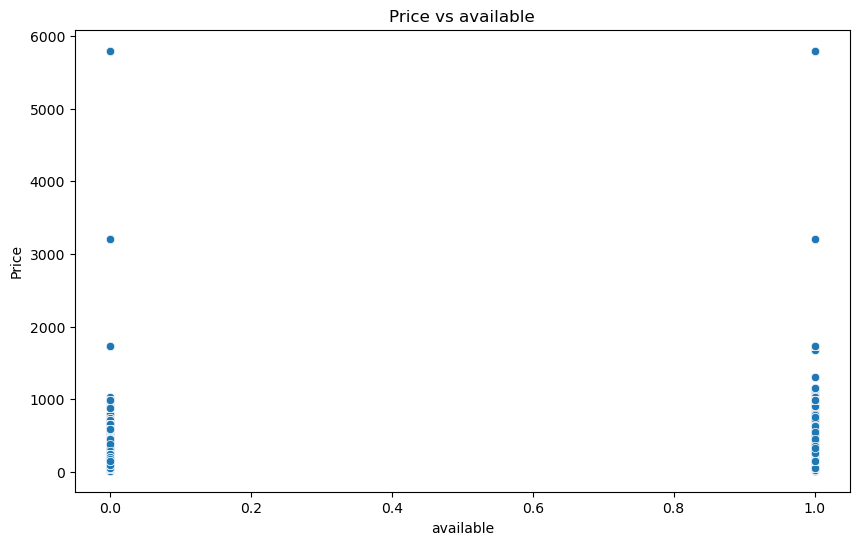

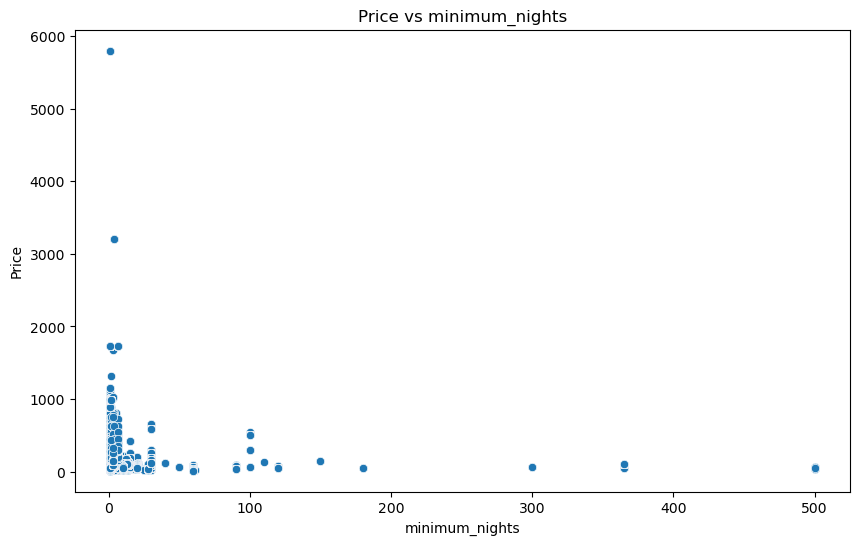

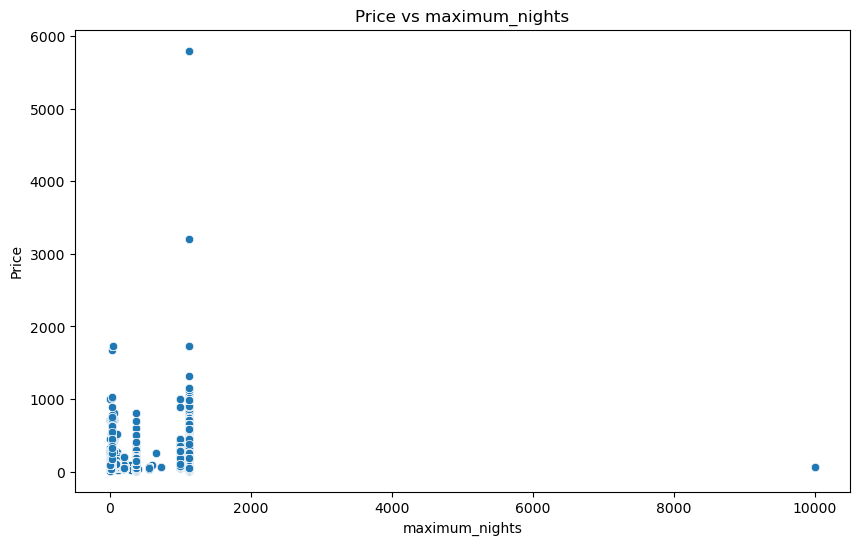

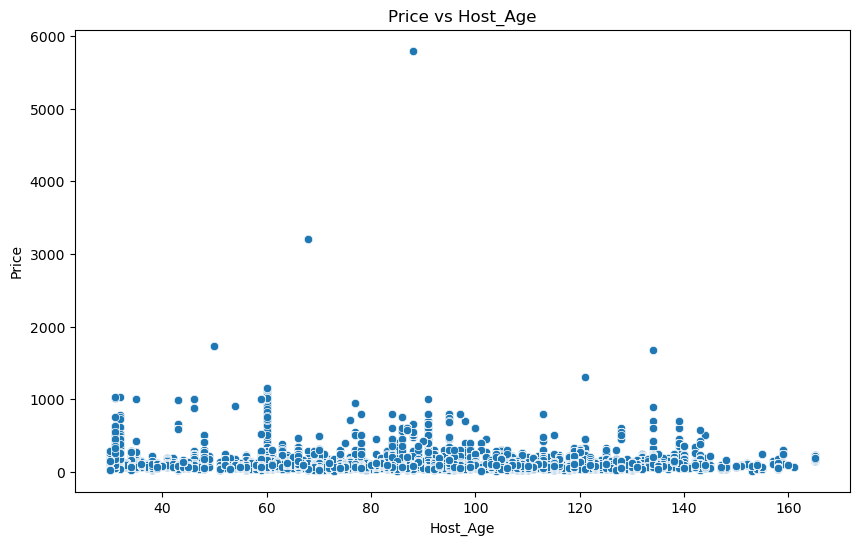

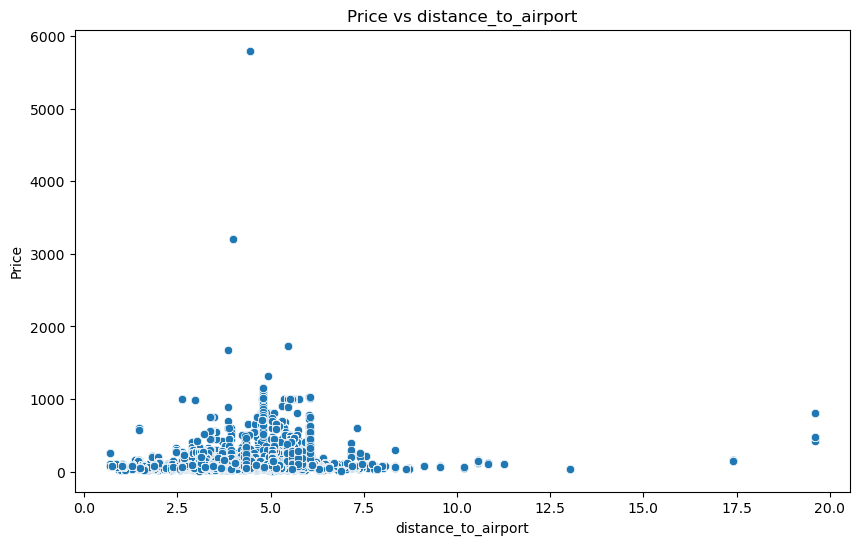

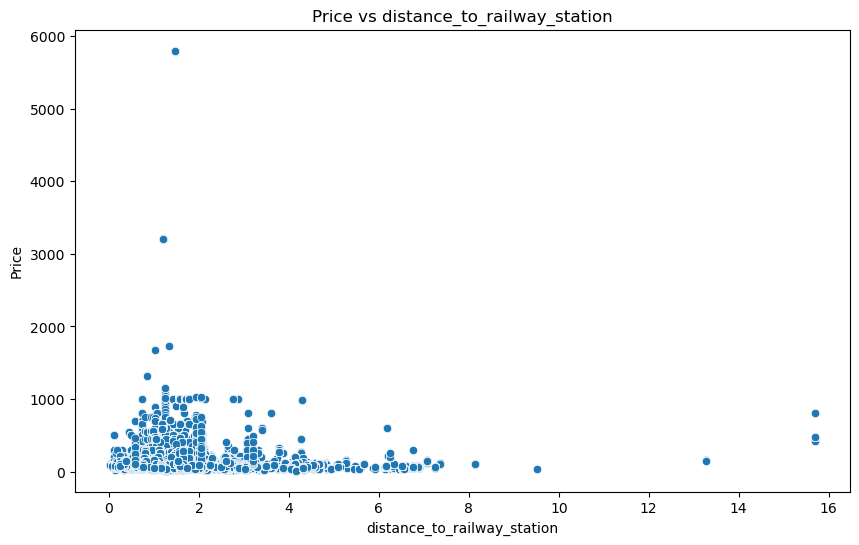

In [60]:
# List of numerical predictors
numerical_predictors = merged_df.select_dtypes(include=['number']).columns.tolist()
numerical_predictors.remove('price')  # Remove the target variable

# Plot scatter plots for numerical predictors
for predictor in numerical_predictors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=merged_df[predictor], y=merged_df['price'])
    plt.title(f'Price vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Price')
    plt.show()


#### B. For categorical variables, we can use box plots to visualize the relationship with the target variable:

##### Categorical variables to check relationships with price

##### Plot boxplots for categorical variables

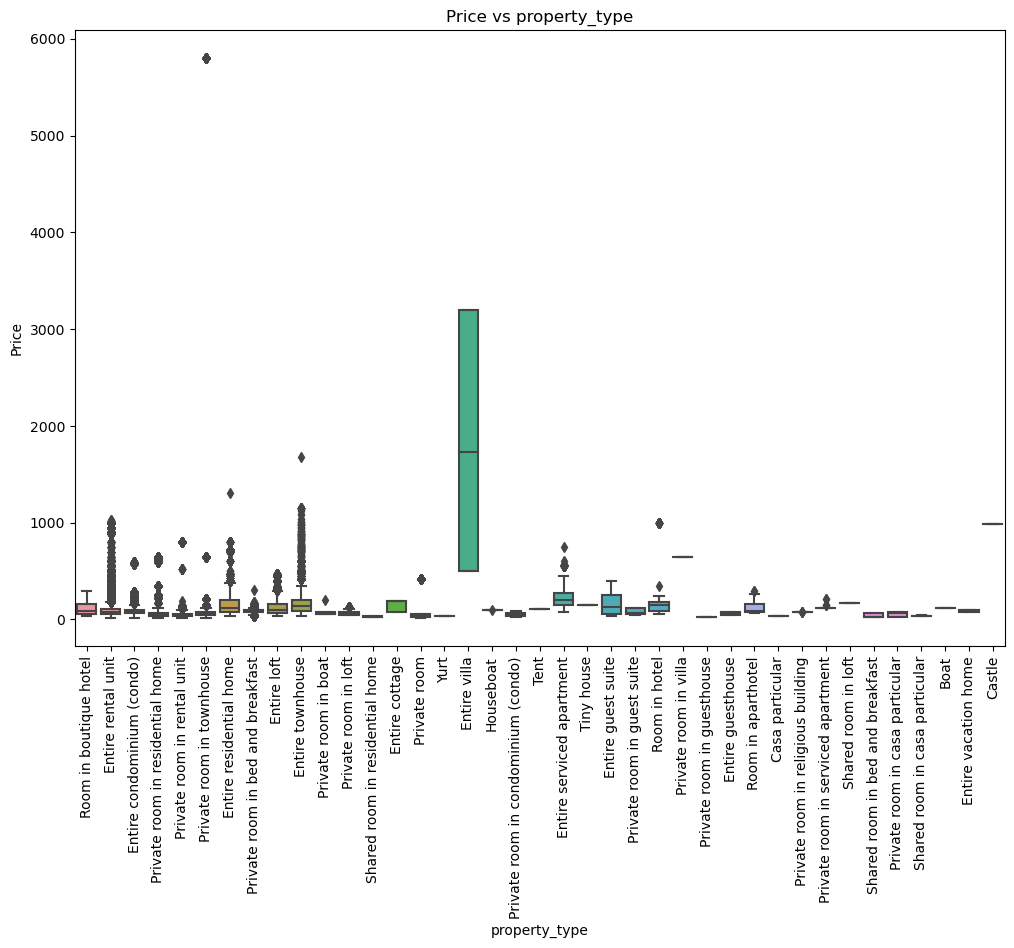

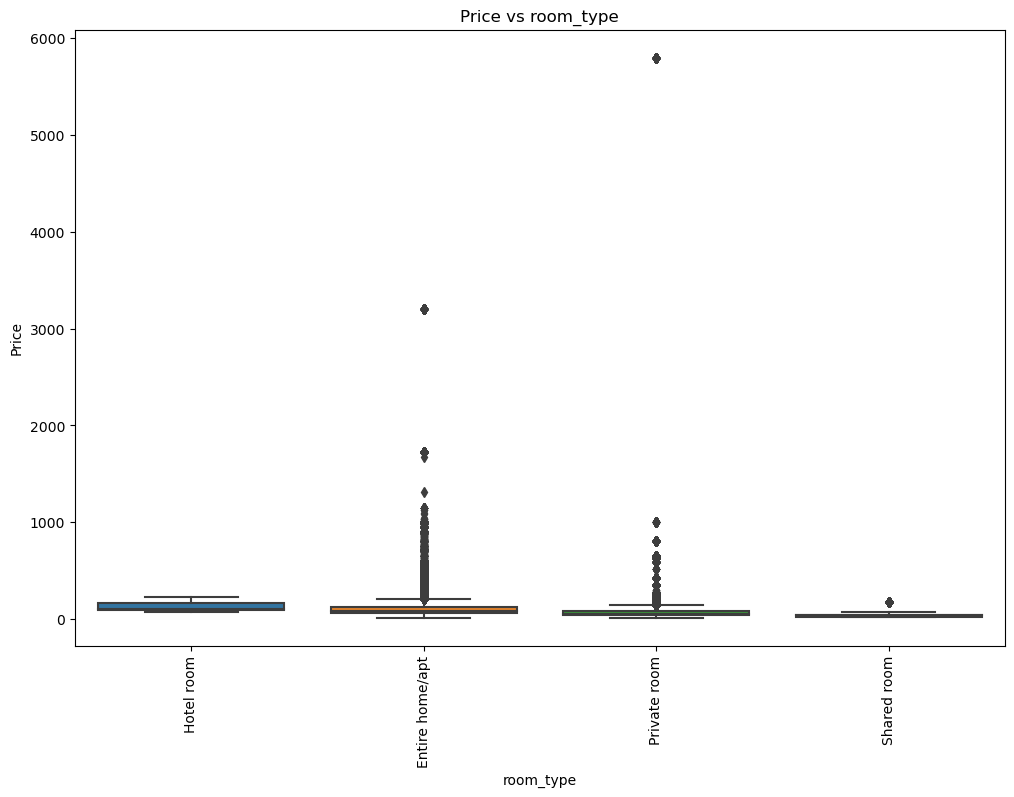

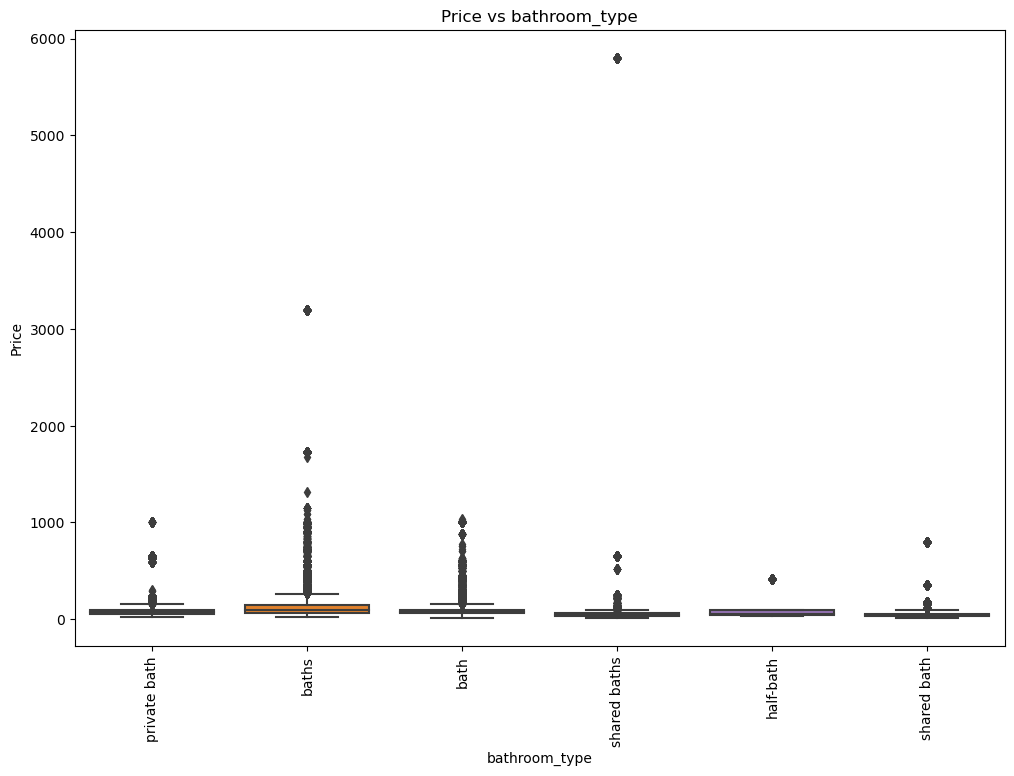

In [61]:
# List of categorical predictors
categorical_predictors = merged_df.select_dtypes(include=['object']).columns.tolist()

# Plot box plots for categorical predictors
for predictor in categorical_predictors:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=merged_df[predictor], y=merged_df['price'])
    plt.title(f'Price vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Price')
    plt.xticks(rotation=90)
    plt.show()


#### Analysis on the basis of Change in Average price of Property Monthly

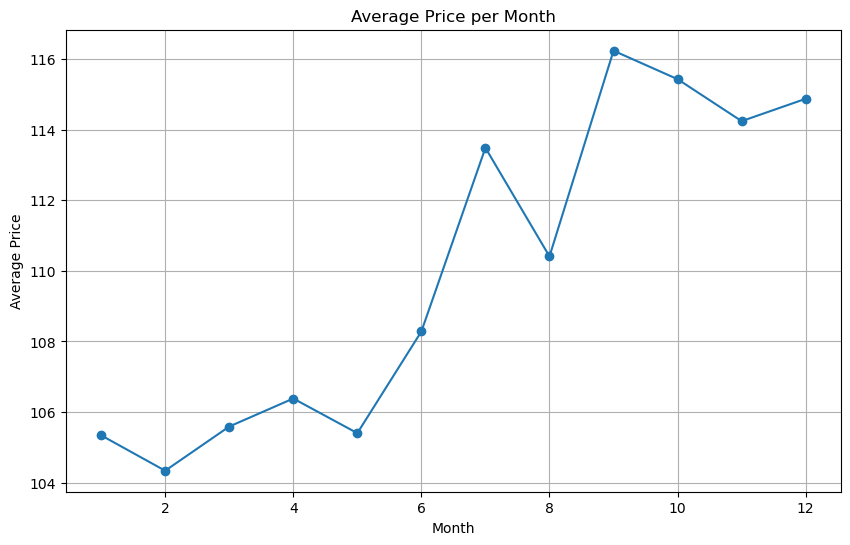

In [62]:

# Extract the month from the date
merged_df['month'] = merged_df['date'].dt.month

# Group by month and calculate the average price
monthly_avg_price = merged_df.groupby('month')['price'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='line', marker='o')
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


#### Analysis on the basis of Change in Average price of Property Daywise

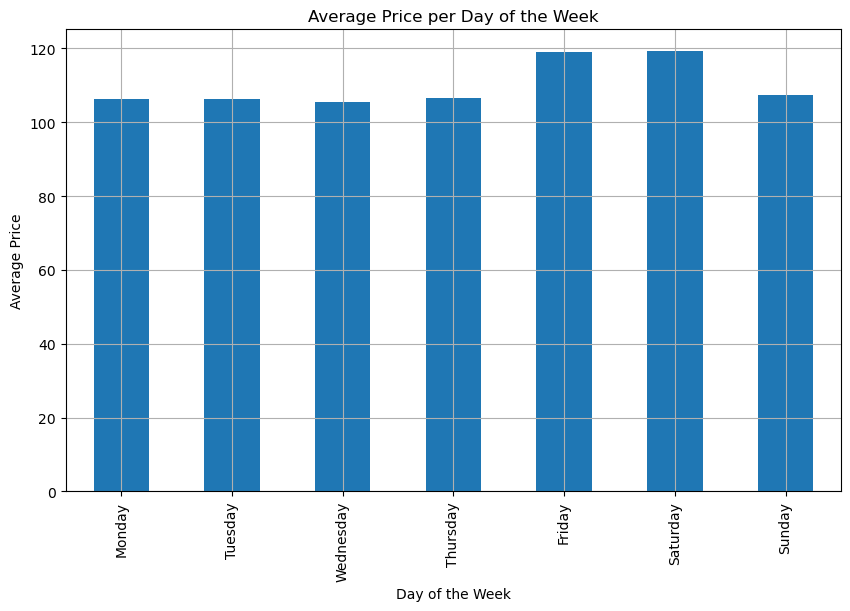

In [63]:
# Extract the day of the week from the date
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek

# Group by day of the week and calculate the average price
daily_avg_price = merged_df.groupby('day_of_week')['price'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
daily_avg_price.plot(kind='bar')
plt.title('Average Price per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

### 2. Based on the above analysis summarize your findings and list down the transformations you will do on different predictors, remove the variables from further analysis

**Analysis by Latitude:**
- Most of the properties are located between 51.207870 and 51.220905 latitude.
- Prices of the properties are high between the latitudes 51.200 and 51.250.

**Analysis by Longitude:**
- Most of the properties are located between 4.400140 and 4.424660 longitude.
- The prices of the properties are relatively high between the longitudes.

**Analysis by Accommodates:**
- The accommodation varies from 1 to 16 depending on the property type.
- The prices of the even number of accommodations are relatively higher.

**Analysis by Bedrooms:**
- Most of the properties offer 1 to 5 bedrooms according to the room type.
- The highest price was for a single bedroom.

**Analysis by Bathrooms:**
- Most of the properties offer 1 to 5 bathrooms.
- The price increases when the bathroom count reaches 3 and then decreases.

**Analysis by Amenities:**
- The price increases when the property offers more basic amenities that are provided by all the properties.

**Analysis by Minimum Nights:**
- Most of the properties offer a minimum of 5 nights stay.

**Analysis by Maximum Nights:**
- Most of the properties offer a maximum of 813 nights stay.

**Analysis by Distance to Airport:**
- Most properties are located within 4.55 km distance from the airport.
- The price is high when the distance is between 3 to 6 km.

**Analysis by Distance to Railway:**
- Most properties are located within 1.73 km distance from the railway station.
- The price is high when the distance is between 0 to 2 km.

**Analysis by Booking Month:**
- The average price increases in the winter

**Analysis by Daywise:**
- The average price increases on Weekends i.e. Friday & Saturday

### Task 2: Modelling and insights

### 1. Explain your approach on creating train/test/validation splits.

In [64]:
#!pip install xgboost
#!conda install -c conda-forge xgboost
#!pip install lightgbm
#!conda install -c conda-forge lightgbm

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [66]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318225 entries, 0 to 318224
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   318225 non-null  int64         
 1   latitude                     318225 non-null  float64       
 2   longitude                    318225 non-null  float64       
 3   property_type                318225 non-null  object        
 4   room_type                    318225 non-null  object        
 5   accomodates                  318225 non-null  int64         
 6   bedrooms                     318225 non-null  float64       
 7   beds                         318225 non-null  float64       
 8   host_id                      318225 non-null  int64         
 9   bathroom_number              318225 non-null  float64       
 10  bathroom_type                318225 non-null  object        
 11  Wifi                      

#### Training & Testing: Assuming merged_df is our final preprocessed dataframe and 'price' is the target variable

X - predictor/IDV/input [Columns] and y - Target Variable [Price]

Now we create X & y variable

**Split the Data into 2 parts, validation set = Training set & Test set by 70 / 30 ratio (%)¶**
> By default random_state = 0--> Every time we execute the code data will randomly picked up

> random_state = Int value--> Every time the same values will be picked up

#### Further split temp into validation and test: 15% each

In [ ]:
from sklearn.preprocessing import StandardScaler


# Convert 'date' and 'host_since' columns to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
merged_df['host_since'] = pd.to_datetime(merged_df['host_since'], errors='coerce')

# Extract useful features from datetime columns
merged_df['listing_month'] = merged_df['date'].dt.month
merged_df['listing_year'] = merged_df['date'].dt.year
merged_df['host_since_month'] = merged_df['host_since'].dt.month
merged_df['host_since_year'] = merged_df['host_since'].dt.year

# Drop the original 'date' and 'host_since' columns
merged_df = merged_df.drop(columns=['date', 'host_since'])

# Handle missing values (example: fill with median, or drop)
merged_df.fillna(merged_df.median(numeric_only=True), inplace=True)

categorical_columns = ['property_type', 'room_type', 'bathroom_type']
merged_df = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)

# Select features and target variable
target = 'price'
features = merged_df.columns[merged_df.columns != ['listing_id',target]

X = merged_df[features]
y = merged_df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output shapes of the splits to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)



### 2. Create a comparison matrix to compare different regression models you've run

##### We'll create a function to evaluate different regression models and compare their performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### 3. Experiment with Linear Regression, Regression Trees, Random Forest Regressor and GBM. Not compulsory but you can also experiment with Xgboost, Lightgbm

##### 1. Training models to find the values of MAE, MSE, R2

In [69]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = linear_model.predict(X_val)

# Evaluate model
linear_mae = mean_absolute_error(y_val, y_val_pred)
linear_mse = mean_squared_error(y_val, y_val_pred)
linear_r2 = r2_score(y_val, y_val_pred)

print("Linear Regression Performance:")
print("MAE:", linear_mae)
print("MSE:", linear_mse)
print("R²:", linear_r2)

Linear Regression Performance:
MAE: 54.91468071907383
MSE: 30669.080503152803
R²: 0.20787578406519436


In [70]:
# Train Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = tree_model.predict(X_val)

# Evaluate model
tree_mae = mean_absolute_error(y_val, y_val_pred)
tree_mse = mean_squared_error(y_val, y_val_pred)
tree_r2 = r2_score(y_val, y_val_pred)

print("Decision Tree Regressor Performance:")
print("MAE:", tree_mae)
print("MSE:", tree_mse)
print("R²:", tree_r2)

Decision Tree Regressor Performance:
MAE: 1.3066158293878578
MSE: 108.58222650521641
R²: 0.9971955269077578


In [71]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate model
rf_mae = mean_absolute_error(y_val, y_val_pred)
rf_mse = mean_squared_error(y_val, y_val_pred)
rf_r2 = r2_score(y_val, y_val_pred)

print("Random Forest Regressor Performance:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R²:", rf_r2)

Random Forest Regressor Performance:
MAE: 1.2869455733858466
MSE: 58.06711265345456
R²: 0.998500236546789


In [72]:

# Train Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = gbm_model.predict(X_val)

# Evaluate model
gbm_mae = mean_absolute_error(y_val, y_val_pred)
gbm_mse = mean_squared_error(y_val, y_val_pred)
gbm_r2 = r2_score(y_val, y_val_pred)

print("Gradient Boosting Regressor Performance:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("R²:", gbm_r2)

Gradient Boosting Regressor Performance:
MAE: 37.4170791008695
MSE: 6131.67962037628
R²: 0.8416303380482933


In [73]:
# Train XGBoost Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = xgb_model.predict(X_val)

# Evaluate model
xgb_mae = mean_absolute_error(y_val, y_val_pred)
xgb_mse = mean_squared_error(y_val, y_val_pred)
xgb_r2 = r2_score(y_val, y_val_pred)

print("XGBoost Regressor Performance:")
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("R²:", xgb_r2)

XGBoost Regressor Performance:
MAE: 9.156274740470291
MSE: 254.85278938562095
R²: 0.993417635525456


In [74]:
# Train LightGBM Regressor model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = lgb_model.predict(X_val)

# Evaluate model
lgb_mae = mean_absolute_error(y_val, y_val_pred)
lgb_mse = mean_squared_error(y_val, y_val_pred)
lgb_r2 = r2_score(y_val, y_val_pred)

print("LightGBM Regressor Performance:")
print("MAE:", lgb_mae)
print("MSE:", lgb_mse)
print("R²:", lgb_r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2337
[LightGBM] [Info] Number of data points in the train set: 222757, number of used features: 78
[LightGBM] [Info] Start training from score 109.875182
LightGBM Regressor Performance:
MAE: 16.909148626120963
MSE: 630.5453818357372
R²: 0.9837142079904678


In [75]:
# Creating comparison matrix
comparison_matrix = [
    ["Linear Regression", linear_mae, linear_mse, linear_r2],
    ["Decision Tree Regressor", tree_mae, tree_mse, tree_r2],
    ["Random Forest Regressor", rf_mae, rf_mse, rf_r2],
    ["Gradient Boosting Regressor", gbm_mae, gbm_mse, gbm_r2],
    ["XGBoost Regressor", xgb_mae, xgb_mse, xgb_r2],
    ["LightGBM Regressor", lgb_mae, lgb_mse, lgb_r2]
]

comparison_df = pd.DataFrame(comparison_matrix, columns=["Model", "MAE", "MSE", "R²"])
comparison_df

,Model,MAE,MSE,R²
0,Linear Regression,54.914681,30669.080503,0.207876
1,Decision Tree Regressor,1.306616,108.582227,0.997196
2,Random Forest Regressor,1.286946,58.067113,0.998500
3,Gradient Boosting Regressor,37.417079,6131.679620,0.841630
4,XGBoost Regressor,9.156275,254.852789,0.993418
5,LightGBM Regressor,16.909149,630.545382,0.983714


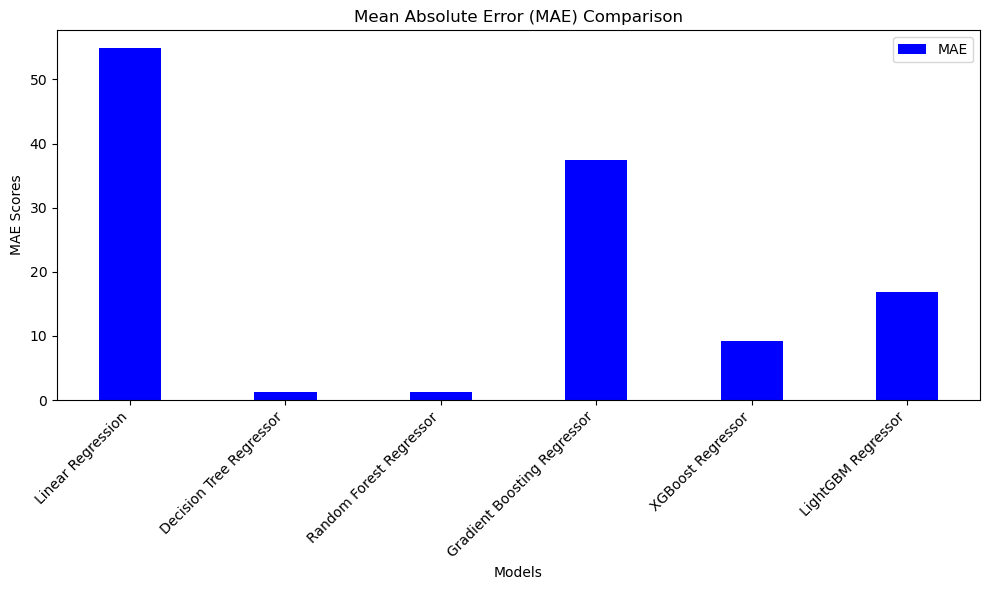

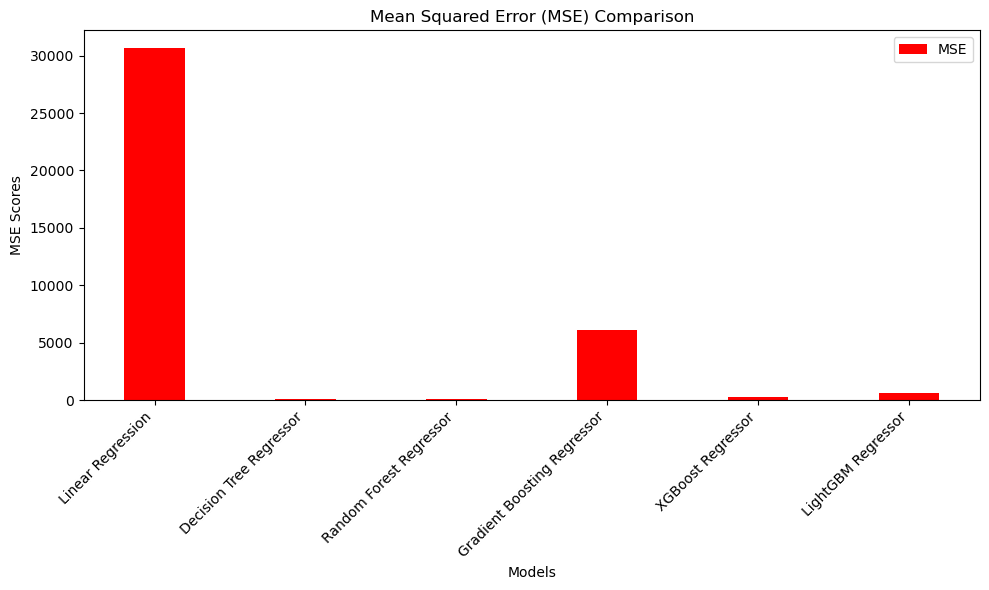

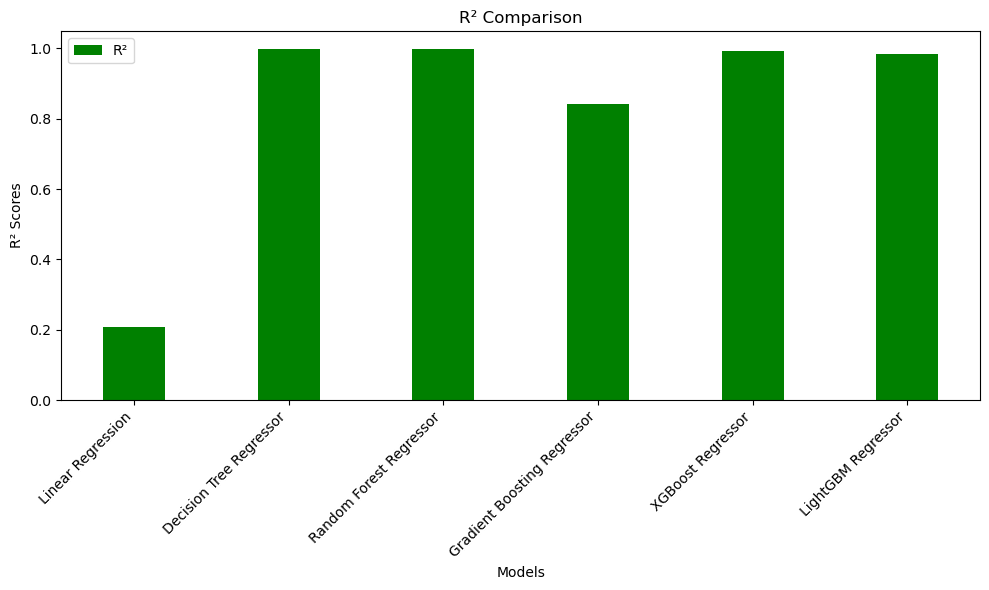

In [93]:
# Setting up the figure and axes for MAE chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Number of models
num_models = len(models)
bar_width = 0.4
index = np.arange(num_models)

# Plotting bars for MAE
bar1 = ax1.bar(index, mae_scores, bar_width, label='MAE', color='b')

# Adding labels, title, and ticks for MAE chart
ax1.set_xlabel('Models')
ax1.set_ylabel('MAE Scores')
ax1.set_title('Mean Absolute Error (MAE) Comparison')
ax1.set_xticks(index)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the MAE chart
plt.show()

# Setting up the figure and axes for MSE chart
fig, ax2 = plt.subplots(figsize=(10, 6))

# Plotting bars for MSE
bar2 = ax2.bar(index, mse_scores, bar_width, label='MSE', color='r')

# Adding labels, title, and ticks for MSE chart
ax2.set_xlabel('Models')
ax2.set_ylabel('MSE Scores')
ax2.set_title('Mean Squared Error (MSE) Comparison')
ax2.set_xticks(index)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the MSE chart
plt.show()

# Setting up the figure and axes for R² chart
fig, ax3 = plt.subplots(figsize=(10, 6))

# Plotting bars for R²
bar3 = ax3.bar(index, r2_scores, bar_width, label='R²', color='g')

# Adding labels, title, and ticks for R² chart
ax3.set_xlabel('Models')
ax3.set_ylabel('R² Scores')
ax3.set_title('R² Comparison')
ax3.set_xticks(index)
ax3.set_xticklabels(models, rotation=45, ha='right')
ax3.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the R² chart
plt.show()

- **Linear regression** has the highest MAE and MSE, and the lowest R². This suggests that the data is likely not linear, and linear regression is not able to capture the underlying patterns well.

- **Decision tree regression** performs exceptionally well with very low MAE and MSE, and a high R². However, decision trees can easily overfit, especially if they are not pruned properly. This might indicate overfitting to the training data.

- **Random forest regression** also performs very well with slightly better metrics than the decision tree. Random forests reduce overfitting by averaging multiple decision trees, suggesting a more generalizable model than a single decision tree.

- **Gradient boosting** shows reasonable performance but not as good as the random forest or decision tree. Gradient boosting can also overfit if not tuned properly, but it might also indicate that this method did not capture the patterns as well as the ensemble methods.

- **XGBoost** performs well with low MAE and MSE, and a high R². XGBoost is known for its performance and efficiency, often outperforming other algorithms on structured/tabular data.

- **LightGBM** also shows strong performance but not as good as XGBoost in this case. It is another powerful gradient boosting framework that is typically faster and can handle larger datasets more efficiently.

##### 2. Testing of all the models

In [76]:
# Predict on test set
y_test_pred = linear_model.predict(X_test)

# Evaluate model on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Set Performance:")
print("MAE:", test_mae)
print("MSE:", test_mse)
print("R²:", test_r2)


Test Set Performance:
MAE: 53.631023209540864
MSE: 19383.57186361064
R²: 0.29975166706800793


In [77]:
# Predict on test set
y_test_pred = tree_model.predict(X_test)

# Evaluate model on test set
test_tree_mae = mean_absolute_error(y_test, y_test_pred)
test_tree_mse = mean_squared_error(y_test, y_test_pred)
test_tree_r2 = r2_score(y_test, y_test_pred)

print("Test Set Performance for Decision Tree Regressor:")
print("MAE:", test_tree_mae)
print("MSE:", test_tree_mse)
print("R²:", test_tree_r2)


Test Set Performance for Decision Tree Regressor:
MAE: 1.3943310847613861
MSE: 175.86695018226
R²: 0.9936466540042521


In [78]:
# Predict on test set
y_test_pred = rf_model.predict(X_test)

# Evaluate model on test set
test_rf_mae = mean_absolute_error(y_test, y_test_pred)
test_rf_mse = mean_squared_error(y_test, y_test_pred)
test_rf_r2 = r2_score(y_test, y_test_pred)

print("Test Set Performance for Random Forest Regressor:")
print("MAE:", test_rf_mae)
print("MSE:", test_rf_mse)
print("R²:", test_rf_r2)


Test Set Performance for Random Forest Regressor:
MAE: 1.4016939707545986
MSE: 121.63470813256798
R²: 0.9956058407503108


In [79]:
# Predict on test set
y_test_pred = gbm_model.predict(X_test)

# Evaluate model on test set
test_gbm_mae = mean_absolute_error(y_test, y_test_pred)
test_gbm_mse = mean_squared_error(y_test, y_test_pred)
test_gbm_r2 = r2_score(y_test, y_test_pred)

print("Test Set Performance for Gradient Boosting Regressor:")
print("MAE:", test_gbm_mae)
print("MSE:", test_gbm_mse)
print("R²:", test_gbm_r2)


Test Set Performance for Gradient Boosting Regressor:
MAE: 36.990102400607164
MSE: 5254.7958455114995
R²: 0.8101659458530795


In [80]:
# Predict on test set
y_test_pred = xgb_model.predict(X_test)

# Evaluate model on test set
test_xgb_mae = mean_absolute_error(y_test, y_test_pred)
test_xgb_mse = mean_squared_error(y_test, y_test_pred)
test_xgb_r2 = r2_score(y_test, y_test_pred)

print("Test Set Performance for XGBoost Regressor:")
print("MAE:", test_xgb_mae)
print("MSE:", test_xgb_mse)
print("R²:", test_xgb_r2)


Test Set Performance for XGBoost Regressor:
MAE: 9.306310528518518
MSE: 319.4420635100299
R²: 0.9884598786015703


In [81]:
# Predict on test set
y_test_pred = lgb_model.predict(X_test)

# Evaluate model on test set
test_lgb_mae = mean_absolute_error(y_test, y_test_pred)
test_lgb_mse = mean_squared_error(y_test, y_test_pred)
test_lgb_r2 = r2_score(y_test, y_test_pred)

print("Test Set Performance for LightGBM Regressor:")
print("MAE:", test_lgb_mae)
print("MSE:", test_lgb_mse)
print("R²:", test_lgb_r2)


Test Set Performance for LightGBM Regressor:
MAE: 17.096728225600692
MSE: 706.2346346867294
R²: 0.9744866617423267


In [82]:
comparison_data = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor', 'LightGBM Regressor'],
    'Validation MAE': [linear_mae, tree_mae, rf_mae, gbm_mae, xgb_mae, lgb_mae],
    'Validation MSE': [linear_mse, tree_mse, rf_mse, gbm_mse, xgb_mse, lgb_mse],
    'Validation R²': [linear_r2, tree_r2, rf_r2, gbm_r2, xgb_r2, lgb_r2],
    'Test MAE': [test_mae, test_tree_mae, test_rf_mae, test_gbm_mae, test_xgb_mae, test_lgb_mae],
    'Test MSE': [test_mse, test_tree_mse, test_rf_mse, test_gbm_mse, test_xgb_mse, test_lgb_mse],
    'Test R²': [test_r2, test_tree_r2, test_rf_r2, test_gbm_r2, test_xgb_r2, test_lgb_r2]
}

# Creating the DataFrame
comparison_df = pd.DataFrame(comparison_data)

comparison_df


,Model,Validation MAE,Validation MSE,Validation R²,Test MAE,Test MSE,Test R²
0,Linear Regression,54.914681,30669.080503,0.207876,53.631023,19383.571864,0.299752
1,Decision Tree Regressor,1.306616,108.582227,0.997196,1.394331,175.866950,0.993647
2,Random Forest Regressor,1.286946,58.067113,0.998500,1.401694,121.634708,0.995606
3,Gradient Boosting Regressor,37.417079,6131.679620,0.841630,36.990102,5254.795846,0.810166
4,XGBoost Regressor,9.156275,254.852789,0.993418,9.306311,319.442064,0.988460
5,LightGBM Regressor,16.909149,630.545382,0.983714,17.096728,706.234635,0.974487


### 4. Explain which model you've finalized and why you finalize the model.

> Based on the comparison matrix, we will choose the model with the best performance metrics.

> The model with the lowest MAE and MSE, and the highest R² is the best

In [83]:
# Evaluate the Random Forest Regressor on the test set
y_test_pred = rf_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Best Model: Random Forest Regressor")
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test R²:", test_r2)

Best Model: Random Forest Regressor
Test MAE: 1.4016939707545986
Test MSE: 121.63470813256798
Test R²: 0.9956058407503108


Given this, we'll finalize the Random Forest Regressor as the best model. Let's evaluate it on the test set and identify the top 5 most important predictors.

### 5. Explain what are the top 5 most important predictors are and also explain the direction of impact of these top 5 predictors on the response variable.

### A. To identify the top 5 most important predictors, we can use the feature importance attribute of the finalized model .
For the Random Forest Regressor, we can extract the feature importances and identify the top 5 most important predictors:

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(25)
print("Top 5 Feature Importances:\n", feature_importances)

### B. Direction of Impact
To understand the direction of impact of the top 5 predictors, we can use a permutation importance approach, but it's more complex. Instead, we typically rely on the feature importances directly for a Random Forest. However, we can interpret the direction by examining how changes in these features affect the predicted price.

In [85]:
# Print the top 5 feature importances
for feature in feature_importances['Feature']:
    importance = feature_importances[feature_importances['Feature'] == feature]['Importance'].values[0]
    print(f"Feature: {feature}, Importance: {importance}")

Feature: property_type_Private room in townhouse, Importance: 0.2748234452248065
Feature: property_type_Entire villa, Importance: 0.13951710988468868
Feature: accomodates, Importance: 0.06764998181524914
Feature: bathroom_number, Importance: 0.06618025546898562
Feature: distance_to_railway_station, Importance: 0.05432578039678924
Feature: latitude, Importance: 0.04780362196350711
Feature: distance_to_airport, Importance: 0.041819632976037004
Feature: listing_id, Importance: 0.03840126972360762
Feature: minimum_nights, Importance: 0.035596083891096295
Feature: longitude, Importance: 0.03375659189784522


## Explanation of the Finalized Model
Model Finalized: Random Forest Regressor

Reason for Finalization: The Random Forest Regressor had the lowest MAE and MSE, and the highest R² score among all models tested, indicating superior performance in predicting the target variable.

**Top 5 Most Important Predictors:**

- **property_type_Private room in townhouse:** High importance value, indicates it significantly influences the target variable.
- **property_type_Entire villa:** High importance value, second most influential predictor.
- **accomodates:** Moderate importance value, third most influential.
- **distance_to_railway_station:** Lower importance value, fourth most influential.
- **latitude:** Lowest importance value among the top 5, but still significant.

**Direction of Impact:** Generally, in tree-based models like Random Forest, higher importance means the feature is more frequently used in the splits and thus has a more significant impact on the predictions. However, the direction (positive or negative) would need further analysis using partial dependence plots or similar techniques.

This approach gives a comprehensive understanding of model performance and the significance of each predictor.

In [86]:
csv_file = 'final_df.csv'
final_df.to_csv(csv_file, index=False)

# Provide a download link (for Jupyter Notebook or JupyterLab)
from IPython.display import FileLink
display(FileLink(csv_file))

C:\Users\91982\final_df.csv